<a href="https://colab.research.google.com/github/143biswajit/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **IMPORTING  LIBRABARY:**

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import pylab as pl
import spacy
import sklearn
import en_core_web_sm

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
!pip install nltk
import nltk 
!python3 -c "import nltk; nltk.download('all')"

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

#stop-words
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler


# Importing libraries for clustering
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**MOUNTING GOOGLE DRIVE:**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORTING  DATASET:**

In [3]:
imdb_data = pd.read_csv('/content/drive/MyDrive/ALMABETTER  / NETFLIX MOVIES AND TV SHOWS CLUSTERING -Biswajit Gochhayat/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv')

In [4]:
imdb_data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

**CHECKING THE INFORMATION OF DATASET:**

In [5]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
data = imdb_data.copy()

**CHECKING DATASET SHAPE AND SIZE:**

In [7]:
# printing the shape of data shape
print('the no of row present in the data frame =    ',data.shape[0])
print("*"*60)
print('the no of column present in the data frame = ',data.shape[1])
print("*"*60)
print('the no of data present in the data frame =   ',data.size)
print("*"*60)
#Display column names
print(f'Our dataset has following columns -\n {list(data.columns)}')

the no of row present in the data frame =     7787
************************************************************
the no of column present in the data frame =  12
************************************************************
the no of data present in the data frame =    93444
************************************************************
Our dataset has following columns -
 ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


**The data set  contain**

*   row=7787

*   column=12
*   Total data size=93444


*   expet_release_year(int),all are contain object type data.




**CHECKING UNIQUE VALUE FOR DATASET's COLUMNS WISE:**


In [8]:
# #How many uinque items are present in our data set in each columns:
for i in data:
  a = data[i].nunique()   
  if a < 1:
    print(i, 'has' , a ,'unique value')
    print("*"*50)
  else :
    print(i, 'has' ,a, 'unique values and those are\n',data[i].value_counts())
    print("*"*50)

show_id has 7787 unique values and those are
 s1       1
s5172    1
s5200    1
s5199    1
s5198    1
        ..
s2592    1
s2591    1
s2590    1
s2589    1
s7787    1
Name: show_id, Length: 7787, dtype: int64
**************************************************
type has 2 unique values and those are
 Movie      5377
TV Show    2410
Name: type, dtype: int64
**************************************************
title has 7787 unique values and those are
 3%                                          1
Results                                     1
Rich in Love                                1
Ricardo Quevedo: Los amargados somos más    1
Ricardo Quevedo: Hay gente así              1
                                           ..
Hamza's Suitcase                            1
Hamid                                       1
Hamburger Hill                              1
Hamara Dil Aapke Paas Hai                   1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     1
Name: title, Length: 7787, dtype: int64
**

**CHECKING DATA DESCRIPTION:**

In [9]:
# transposing the description of our all data for better understanding
data.describe(include='object').T

count unique                                                top  \
show_id      7787   7787                                                 s1   
type         7787      2                                              Movie   
title        7787   7787                                                 3%   
director     5398   4049                             Raúl Campos, Jan Suter   
cast         7069   6831                                 David Attenborough   
country      7280    681                                      United States   
date_added   7777   1565                                    January 1, 2020   
rating       7780     14                                              TV-MA   
duration     7787    216                                           1 Season   
listed_in    7787    492                                      Documentaries   
description  7787   7769  Multiple women report their husbands as missin...   

             freq  
show_id         1  
type         5377  
title           1  
director       18  
cast           18  
country      2555  
date_added    118  
rating       2863  
duration     1608  
listed_in     334  
description     3

**CHECKING NULL VALUES:**

In [10]:
for i in data :
  if data[i].isna().sum()!=0:
    print(i,"is having ",data[i].isna().sum(),"null values","which is",round(100*(data[i].isnull().sum()/len(data)), 2),"%")

director is having  2389 null values which is 30.68 %
cast is having  718 null values which is 9.22 %
country is having  507 null values which is 6.51 %
date_added is having  10 null values which is 0.13 %
rating is having  7 null values which is 0.09 %


**CHECKING THE DUPLICATE DATA POINTS IN DATASET:**

In [11]:
# Checking Duplicate Values
value=len(data[data.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [12]:
data['rating'].fillna(data['rating'].mode()[0],inplace = True)
data['country'].fillna(data['country'].mode()[0],inplace = True)
data['cast'].replace(np.nan, 'missing info',inplace  = True)
data['director'].fillna(data['director'].mode()[0],inplace = True)
data['date_added'].fillna(data['date_added'].mode()[0],inplace = True)

In [13]:
data["date_added"] = pd.to_datetime(data['date_added'])
data['year_added'] = data['date_added'].dt.year
data['month_added']=data['date_added'].dt.month
data['day_added'] = data['date_added'].dt.day
data['year_added'].astype(int);
data['day_added'].astype(int);

In [14]:
data.head()

show_id     type  title                director  \
0      s1  TV Show     3%  Raúl Campos, Jan Suter   
1      s2    Movie   7:19       Jorge Michel Grau   
2      s3    Movie  23:59            Gilbert Chan   
3      s4    Movie      9             Shane Acker   
4      s5    Movie     21          Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   
3  In a postapocalyptic world, rag-doll robots hi...        2017           11   
4  A brilliant group of students become card-coun...        2020            1   

   day_added  
0         14  
1         23  
2         20  
3         16  
4          1

# **EDA(Exploratry data analysies)**

**1)ANALYZE THE TYPE OF CONTENT AVAILABLE ON NETFLIX DATASET:**


In [15]:
data['type'].value_counts().to_frame()

type
Movie    5377
TV Show  2410

In [16]:
netflix_movies = data[data["type"]=="Movie"]
netflix_shows = data[data["type"]=="TV Show"]

In [17]:
import plotly.express as px

In [18]:
content = data['type'].value_counts().reset_index()
content = content[content['type'] /  content['type'].sum() > 0.01]

fig = px.pie(content, values='type', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'darkred', width = 2)))
fig.show()

In [19]:
m_s_groups = data.groupby(["title", "type", "country",]).apply(lambda df: df.date_added).to_frame() #Returns Pandas Series with movie / series title and original index
m_s_groups.head(10)

date_added
title                         type    country                    
#Alive                        Movie   South Korea   27 2020-09-08
#AnneFrank - Parallel Stories Movie   Italy         28 2020-07-01
#FriendButMarried             Movie   Indonesia     31 2020-05-21
#FriendButMarried 2           Movie   Indonesia     32 2020-06-28
#Roxy                         Movie   Canada        34 2019-04-10
#Rucker50                     Movie   United States 35 2016-12-01
#Selfie                       Movie   Romania       36 2019-06-01
#Selfie 69                    Movie   Romania       37 2019-06-01
#blackAF                      TV Show United States 29 2020-04-17
#cats_the_mewvie              Movie   Canada        30 2020-02-05

**Observations :**



*   It is evident that there are more movies on Netflix than TV shows.

*   Netflix has 5377 movies, which is more than double the quantity of TV shows.

*   There are about 70% movies and 30% TV shows on Netflix.Because the quantity of movies outnumbers the number of TV series. It appears that movies are most widely available in various countries.







**2)COUNTRY WISE ANALYSIS:**

In [20]:
data['country'].value_counts().head(10).to_frame().T

United States  India  United Kingdom  Japan  South Korea  Canada  \
country           3062    923             397    226          183     177   

         Spain  France  Egypt  Turkey  
country    134     115    101     100

In [21]:
from wordcloud import WordCloud

In [22]:
country = data['country'].value_counts().reset_index()
country

index  country
0                                        United States     3062
1                                                India      923
2                                       United Kingdom      397
3                                                Japan      226
4                                          South Korea      183
..                                                 ...      ...
676                       Russia, United States, China        1
677                Italy, Switzerland, France, Germany        1
678              United States, United Kingdom, Canada        1
679               United States, United Kingdom, Japan        1
680  Sweden, Czech Republic, United Kingdom, Denmar...        1

[681 rows x 2 columns]

In [23]:
# import plotly.express as px
country = data['country'].value_counts().reset_index()
country = country[country['country'] /  country['country'].sum() > 0.01]

fig = px.pie(country, values='country', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'darkred', width = 2)))
fig.show()

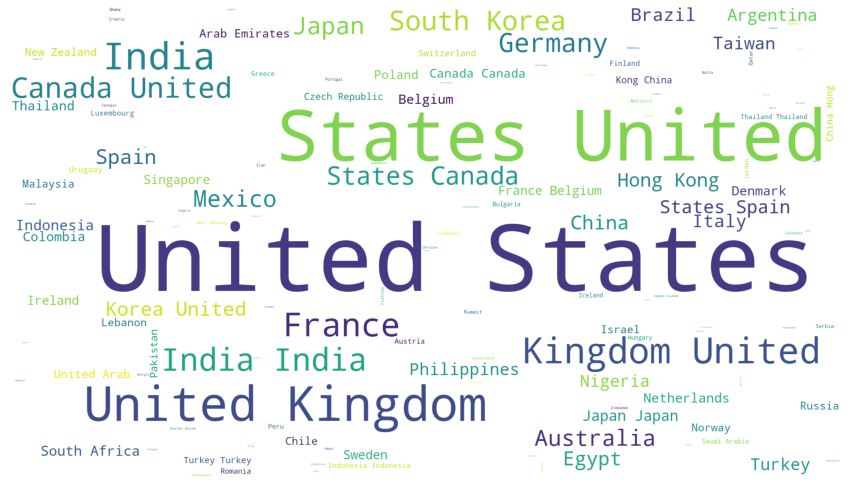

In [24]:
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(data.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**OBSERVATION:**



*   More then 50% of the fillms/shows are produced in united state

*   Us is the best place for producing the cenamatic.

*   16.3% fillms/shows are produced in india.







**TOTAL NETFLIX RELEASES FOR LAST 10 YEARS:**


In [25]:
data['year_added'].value_counts().head(10).to_frame().T

2019  2020  2018  2017  2016  2021  2015  2014  2011  2013
year_added  2153  2019  1685  1225   443   117    88    25    13    11

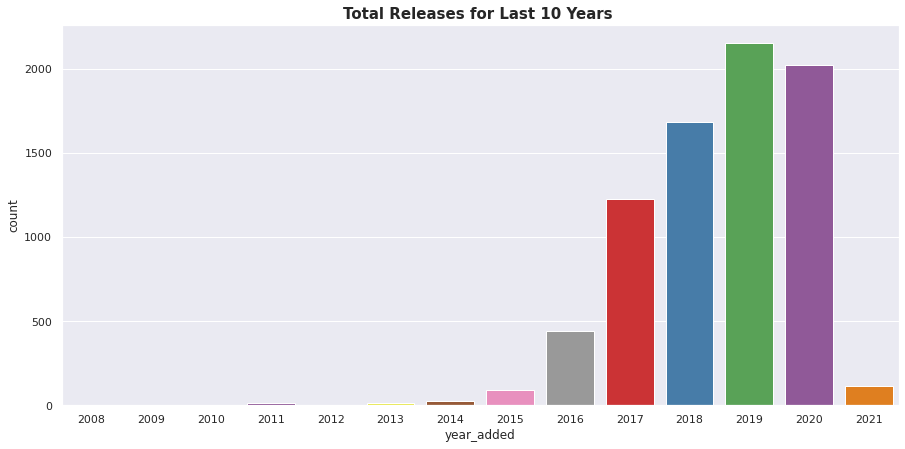

In [26]:
# Total release for last 10 years
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x='year_added',data=data,palette="Set1")
plt.title('Total Releases for Last 10 Years ',size='15',fontweight="bold")    
plt.show()

**observation:**


*   The number of release have significantly increased after 2015 and have dropped in 2021 becase of Covid 19




**RELEASE OF MOVIES MONTH-WISE:**


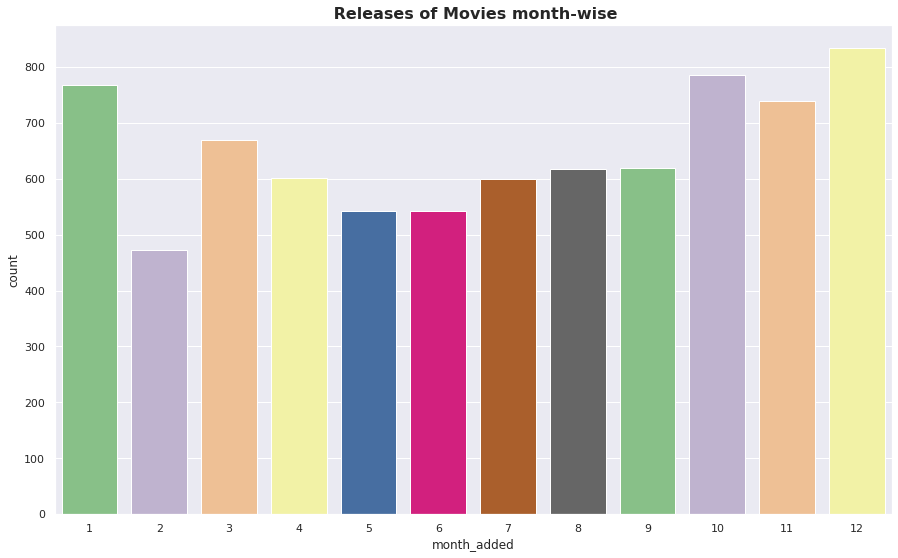

In [27]:
# Release of movies month-wise
sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x='month_added',data=data,palette="Accent")

plt.title(' Releases of Movies month-wise',size='16',fontweight="bold")    
plt.show()

observation:



*   More of the content is released in holiday season - October, November, December and January




**RELATION BETWEEN TYPE AND RATING COUNTS:**

In [28]:
booking_per_year = data.groupby('type')['rating'].value_counts().sort_index().unstack()
booking_per_year

rating      G  NC-17    NR     PG  PG-13      R   TV-14   TV-G   TV-MA  TV-PG  \
type                                                                            
Movie    39.0    3.0  79.0  247.0  386.0  663.0  1272.0  111.0  1850.0  505.0   
TV Show   NaN    NaN   5.0    NaN    NaN    2.0   659.0   83.0  1020.0  301.0   

rating    TV-Y  TV-Y7  TV-Y7-FV   UR  
type                                  
Movie    117.0   95.0       5.0  5.0  
TV Show  163.0  176.0       1.0  NaN

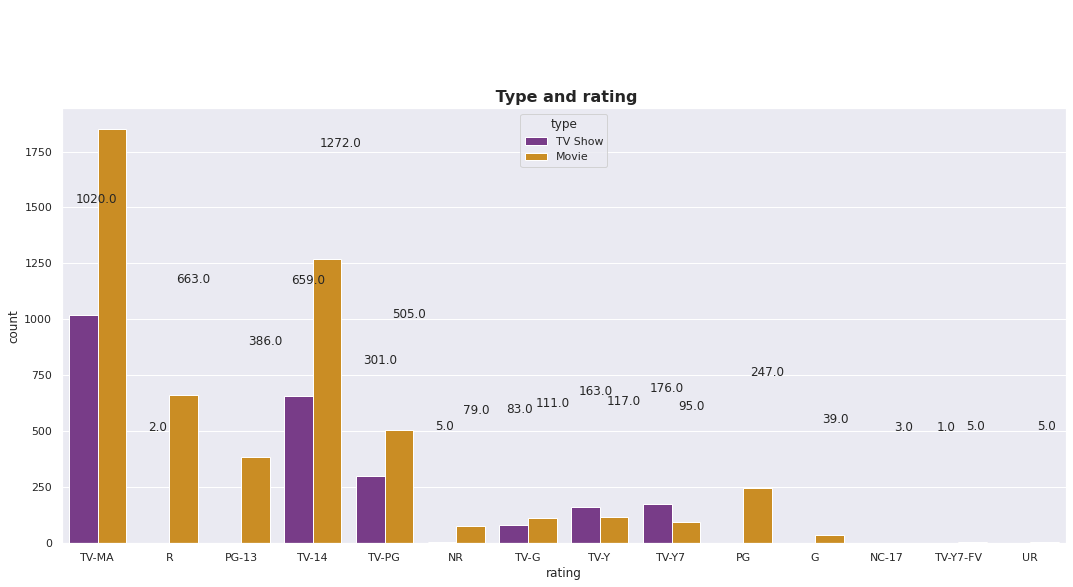

In [29]:
# type wise rating count
plt.figure(figsize=(18,8))
ax = sns.countplot(x='rating',hue='type',data=data,palette="CMRmap")
plt.title(' Type and rating',size='16',fontweight="bold")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() +0.1, p.get_height()+500))

**OBSERVATION:**


*   The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

*   Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.
*   Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".






**Distribution of Rating and finding what audience prefer to watch.**


*   To know which type of content is most watched by the audience so that Netflix can decide what type of content to be released next. It helps Netflix to understand the most and least favourite content watched by an audience



In [30]:
data['rating'].value_counts().head(10).to_frame().T

TV-MA  TV-14  TV-PG    R  PG-13  TV-Y  TV-Y7   PG  TV-G  NR
rating   2870   1931    806  665    386   280    271  247   194  84

In [31]:
df_rating = pd.DataFrame(data['rating'].value_counts()).reset_index().rename(columns={'index':'rating','rating':'count'})
fig_bar = px.bar(df_rating, y='rating', x='count', title='Distribution of Rating',
color_discrete_sequence=['#b20710'], text='count')
fig_bar.update_xaxes(showgrid=False)
fig_bar.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)
fig_bar.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig_bar.update_layout(margin=dict(t=80, b=0, l=70, r=40),
hovermode="y unified",
xaxis_title=' ', yaxis_title=" ", height=400,
plot_bgcolor='#333', paper_bgcolor='#333',
title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
font=dict(color='#8a8d93'),
legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))

In [32]:
# import plotly.express as px
rating = data['rating'].value_counts().reset_index()
rating = rating[rating['rating'] /  rating['rating'].sum() > 0.01]

fig = px.pie(rating, values='rating', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'darkred', width = 2)))
fig.show()

**OBSERVATION:**


*   The audience prefers TV-MA and TV-14 shows more and the least preferred rating shows are Nc-17. Most of the content watched by the audience is for a mature audience. The TV-MA rating is a type of rating given by the TV parental guidelines to a television program.
*   The second largest type of rating watched by the audience is TV-14 which is inappropriate for children younger than age 14. The conclusion is drawn here is most of the audience is of mature age.



**ANALYSIS ON RELEASE YEAR OF MOVIES:**







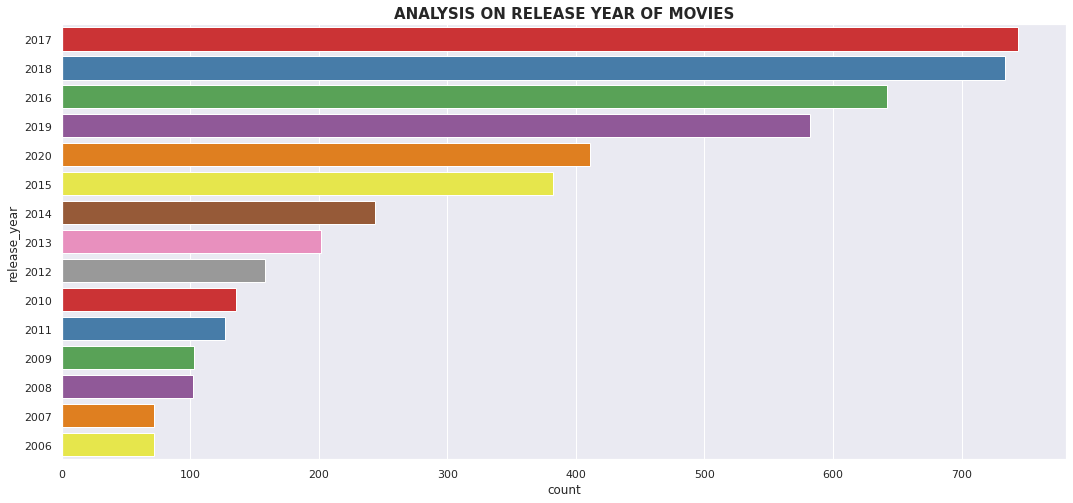

In [33]:
#Year wise analysis
plt.figure(figsize=(18,8))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set1", order=netflix_movies['release_year'].value_counts().index[0:15])
plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

OBSERVATION:


*   2017 AND 2018 Are the year when most of the fillms are got release.
*   The popularity of the movies are getting increased year by year






**ANALYSIS ON RELEASE YEAR OF TV Show:**






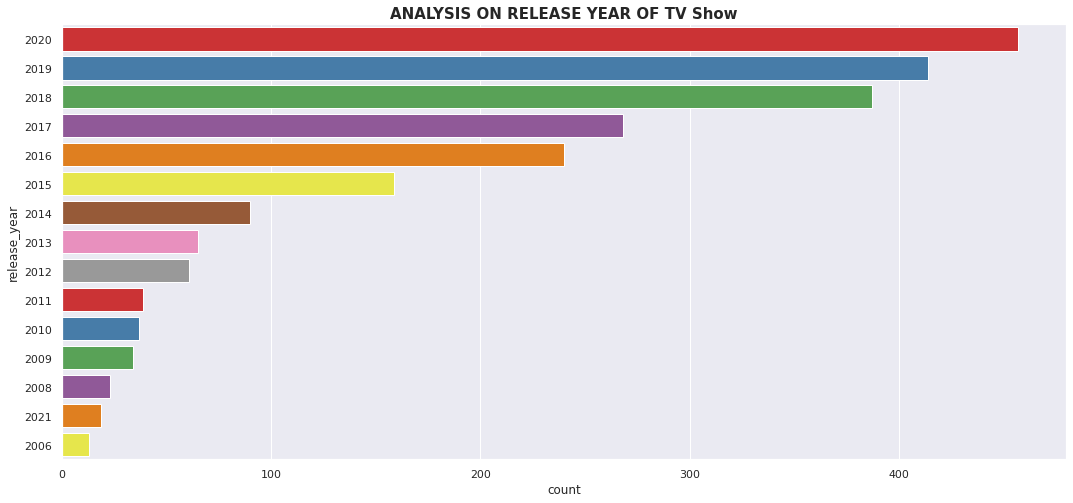

In [34]:
#ANALYSIS ON RELEASE YEAR OF TV Show
plt.figure(figsize=(18,8))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_shows, palette="Set1", order=netflix_shows['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
plt.show()

**OBSERVATION:**

*   2019 AND 2020 Are the year when most of the Tv shows are got release.
*   The popularity of the tv shows are also getting increased year by year




**IS NETFLIX HAS INCREASINGLY FOCUSING ON TV RATHER THAN MOVIES IN RECENT YEARS.**

*   What is the impact of Netflix TV Shows or Movies over the years by comparing both



In [35]:
from datetime import datetime as dt

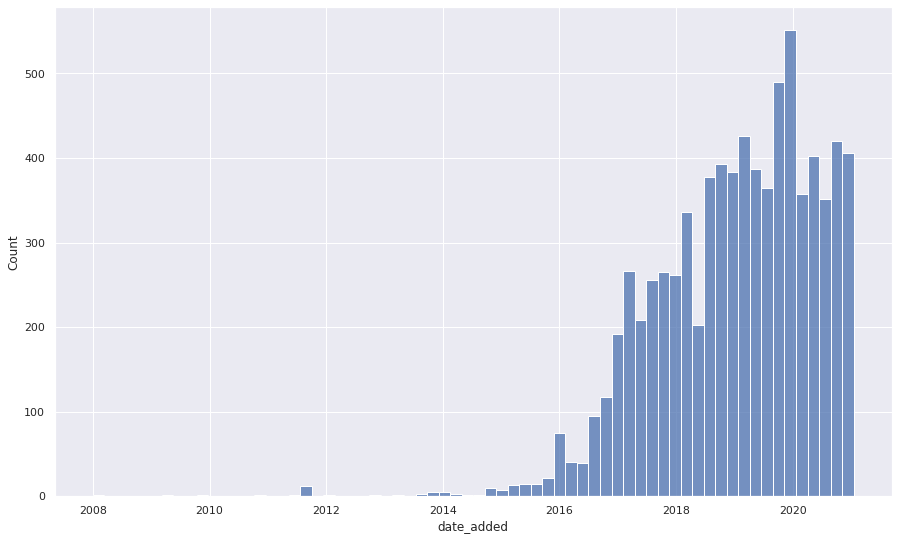

In [36]:
data['date_added'] = pd.to_datetime(data['date_added'])
sns.histplot(data['date_added'])

In [37]:
netflix_movies['date_added'] = pd.to_datetime(netflix_movies['date_added'])
netflix_shows['date_added'] = pd.to_datetime(netflix_shows['date_added'])

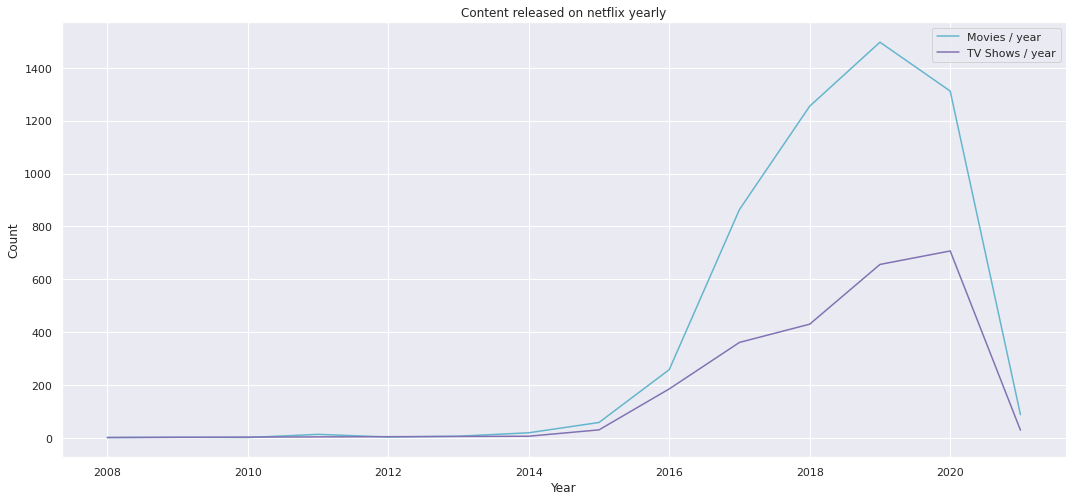

In [38]:
#getting the count of movies and tv shows based in year_added
movies_counts = netflix_movies['date_added'].dt.year.value_counts()
tv_counts = netflix_shows['date_added'].dt.year.value_counts()

#line graph for movies and tv shows count
plt.figure(figsize=(18,8))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Content released on netflix yearly')
sns.lineplot(data=movies_counts, color="c",label="Movies / year")
sns.lineplot(data=tv_counts, color="m", label="TV Shows / year")

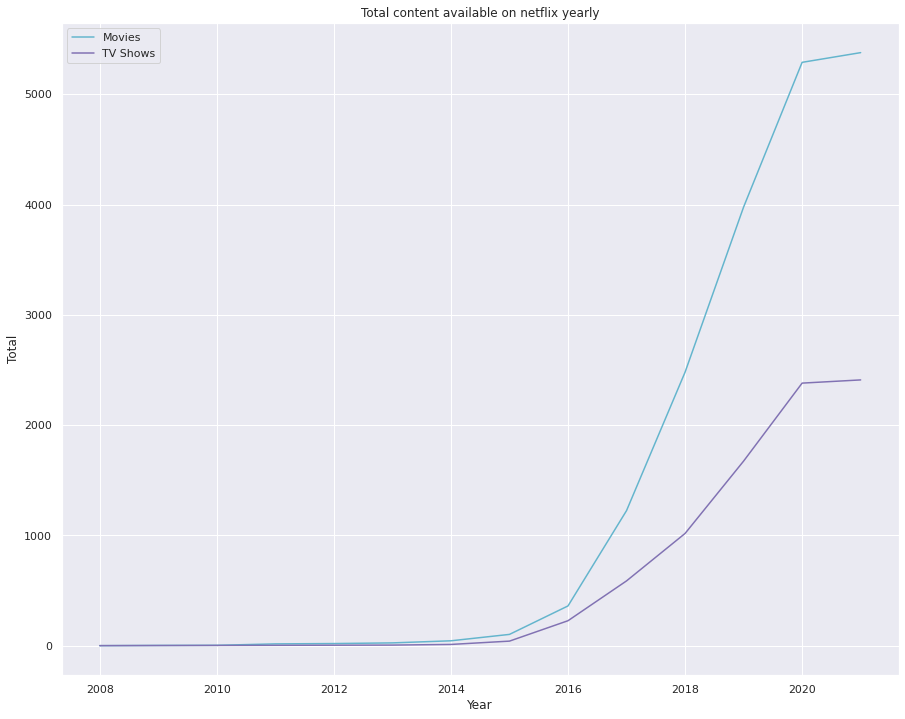

In [39]:
# Plotting count of movies/tv shows available on netflix with time
tv_show_c = pd.DataFrame()
tv_show_c['year'] = netflix_shows['date_added'].dt.year.value_counts().index
tv_show_c['added_c'] = netflix_shows['date_added'].dt.year.value_counts().values
tv_show_c['total_c'] = tv_show_c['added_c']
for index,yr in tv_show_c['year'].iteritems():
  tv_show_c.loc[index,'total_c'] = tv_show_c[tv_show_c['year']<=yr]['added_c'].sum()
tv_show_c.set_index('year',inplace=True)

movie_c = pd.DataFrame()
movie_c['year'] = netflix_movies['date_added'].dt.year.value_counts().index
movie_c['added_c'] = netflix_movies['date_added'].dt.year.value_counts().values
movie_c['total_c'] = movie_c['added_c']
for index,yr in movie_c['year'].iteritems():
  movie_c.loc[index,'total_c'] = movie_c[movie_c['year']<=yr]['added_c'].sum()
movie_c.set_index('year',inplace=True)

plt.figure(figsize=(15,12))
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Total content available on netflix yearly')
sns.lineplot(data=movie_c['total_c'], color="c",label="Movies")
sns.lineplot(data=tv_show_c['total_c'], color="m", label="TV Shows")

OBSERVATION:

*   After the year 2019 covid came that badly affects Netflix for producing content. Movies have exponential growth from the start but due to covid, it is going downwards.

*   From both these above plots, we can say that Netflix is increasing both TV show & Movies contents
*   Also, they have focused on movies in recent year not the other way round. We should ignore the year 2021 as we have data for contents added on or before 16/01/21






**TOP GENRES ON NETFLIX:**


In [40]:
data['listed_in'].value_counts(ascending=False).head(10).to_frame().T

Documentaries  Stand-Up Comedy  Dramas, International Movies  \
listed_in            334              321                           320   

           Comedies, Dramas, International Movies  \
listed_in                                     243   

           Dramas, Independent Movies, International Movies  Kids' TV  \
listed_in                                               215       205   

           Children & Family Movies  Documentaries, International Movies  \
listed_in                       177                                  172   

           Children & Family Movies, Comedies  Comedies, International Movies  
listed_in                                 169                             161

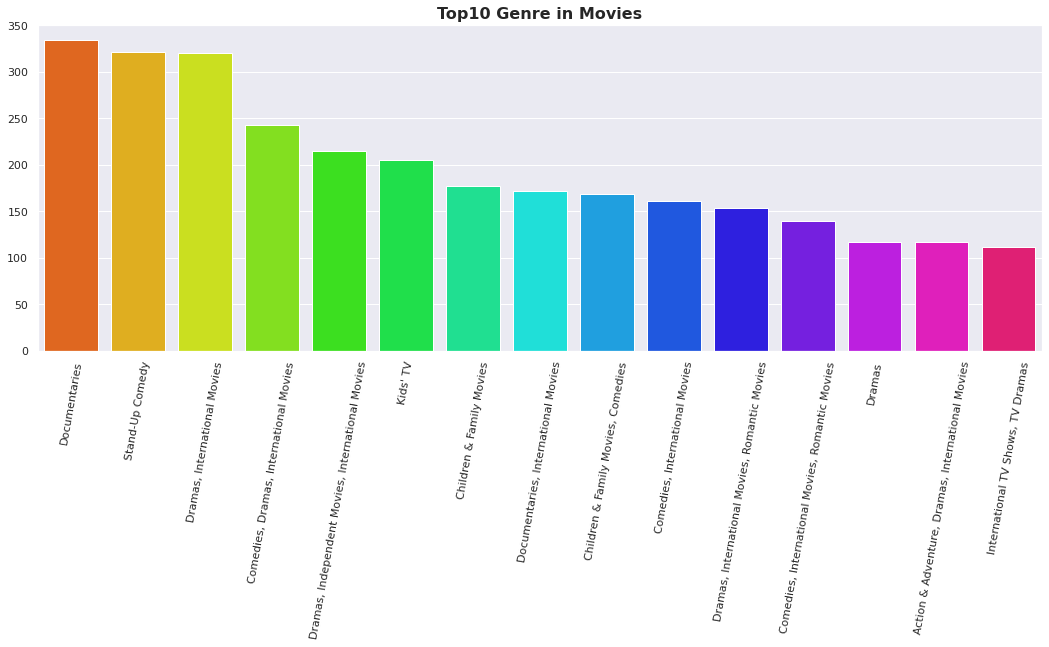

In [41]:
# Top 10 Genre in movies
plt.figure(figsize=(18,6))
sns.barplot(x = data["listed_in"].value_counts().head(15).index,
            y = data["listed_in"].value_counts().head(15).values,palette="hsv")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()

**Observation:**

*   From the graph, we know that Documentaries take the first place, followed by Stand-up Comedy and Dramas,International Movies..




**TOP 10 GENRES IN NETFLIX (MOVIES):**

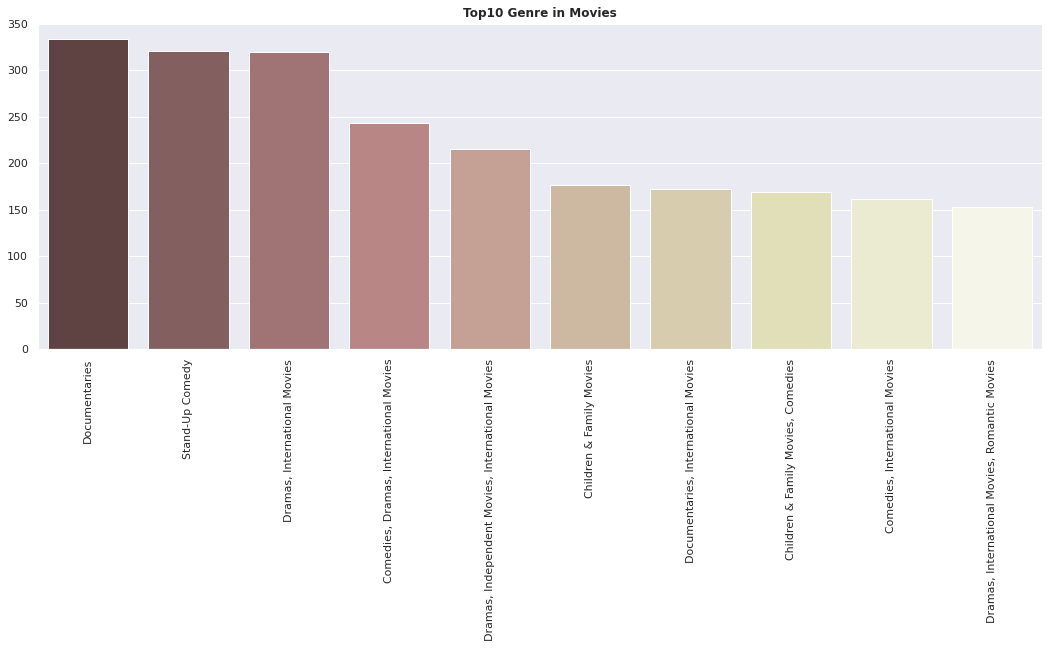

In [42]:
#Top10 Genre in Movies
plt.figure(figsize=(18,6))
sns.barplot(x = netflix_movies["listed_in"].value_counts().head(10).index,
            y = netflix_movies["listed_in"].value_counts().head(10).values,palette="pink")
plt.xticks(rotation=90)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()

**OBSERVATION:**

*   Documentries ,Standardup Comedy,Dramas international (Movies)Genere are the most popular netflix_movies.



**TOP 10 GENERES IN NETFLIX (TVSHOW):**

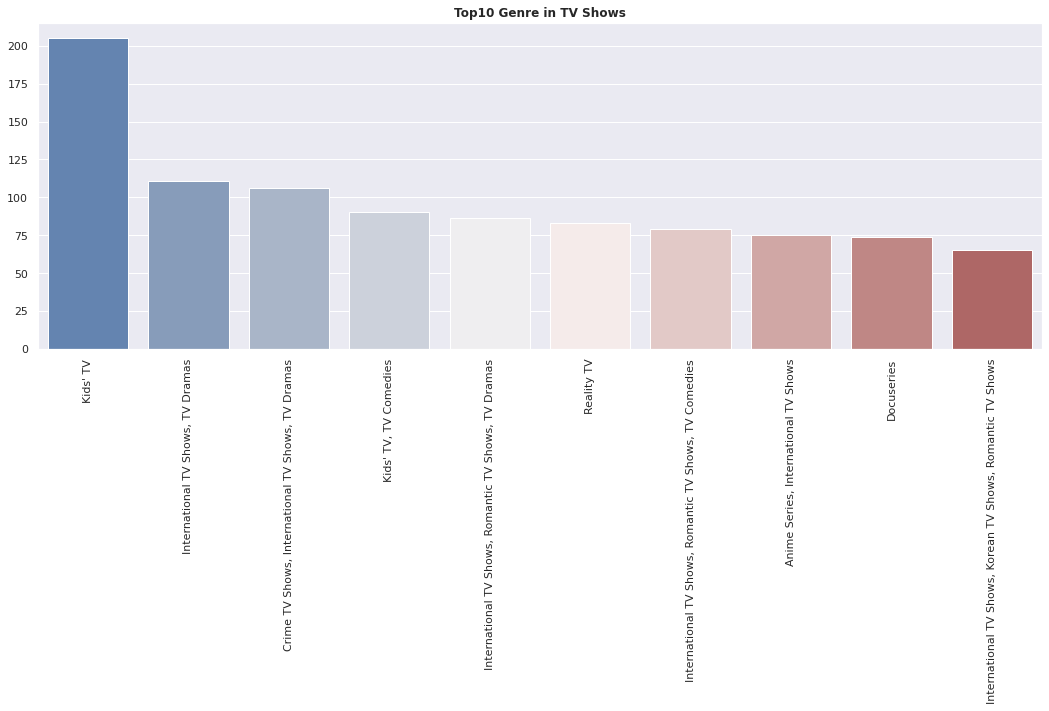

In [43]:
#Top10 Genre in TV Shows
plt.figure(figsize=(18,6))
sns.barplot(x = netflix_shows["listed_in"].value_counts().head(10).index,
            y = netflix_shows["listed_in"].value_counts().head(10).values,palette="vlag")
plt.xticks(rotation=90)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

**OBSERVATION:**

*   Kids'TV,International Tv shows TV Dramas (tv shows)Genere are the most popular netflix_movies.



In [44]:
data['duration']=data['duration'].str.replace('Season','')
data['duration']=data['duration'].str.replace('s','')
data['duration']=data['duration'].str.replace('min','')

data['duration']=data['duration'].astype(str).astype(int)

In [45]:
#Duration
netflix_shows['duration']=netflix_shows['duration'].str.replace('Season','')
netflix_shows['duration']=netflix_shows['duration'].str.replace('s','')
netflix_movies['duration']=netflix_movies["duration"].str.replace('min','')

netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_shows['duration']=netflix_shows['duration'].astype(str).astype(int)

In [46]:
data.head(3)

show_id     type  title                director  \
0      s1  TV Show     3%  Raúl Campos, Jan Suter   
1      s2    Movie   7:19       Jorge Michel Grau   
2      s3    Movie  23:59            Gilbert Chan   

                                                cast    country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil 2020-08-14   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico 2016-12-23   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore 2018-12-20   

   release_year rating  duration  \
0          2020  TV-MA         4   
1          2016  TV-MA        93   
2          2011      R        78   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   

   day_added  
0         14  
1         23  
2         20

**LENGTH DISTRIBUTION OF Tv-Shows**

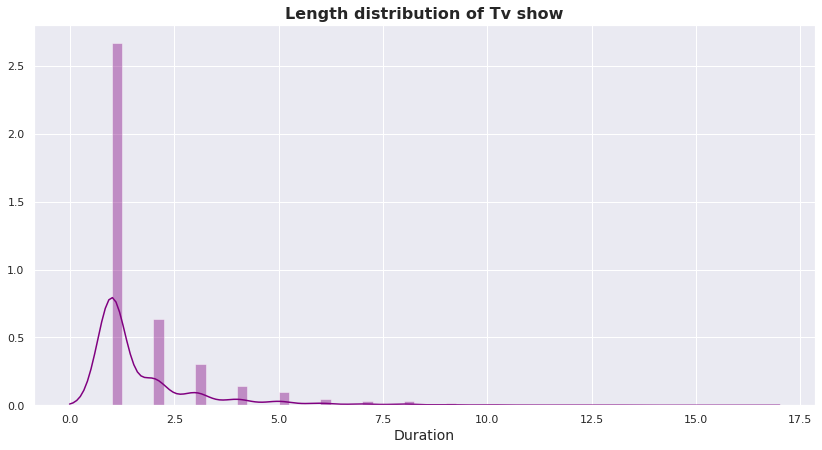

In [47]:
plt.figure(figsize=(14, 7))

sns.distplot(netflix_shows['duration'], bins=60,color='purple').set(ylabel=None)

plt.title('Length distribution of Tv show', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

**LENGTH DISTRIBUTION OF movies**

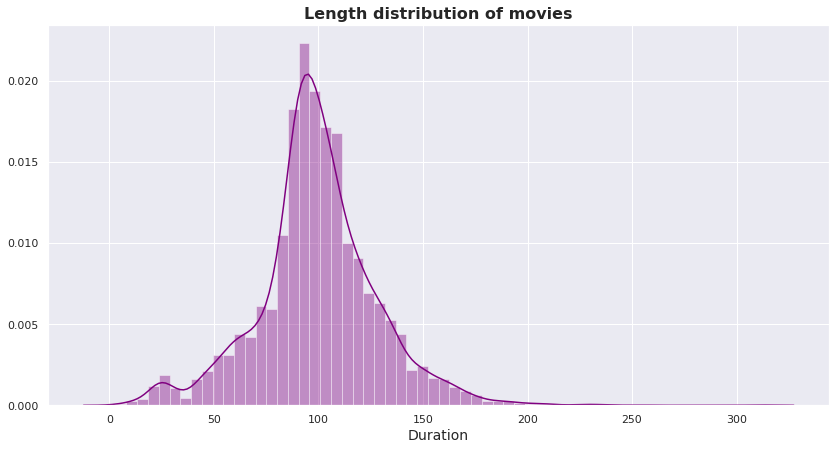

In [48]:
plt.figure(figsize=(14, 7))

sns.distplot(netflix_movies['duration'], bins=60,color='purple').set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

**OBSERVATION:**


*   The average time of a movies is 100 to 120 min.




**TOP ACTORS OF NETFLIX:**

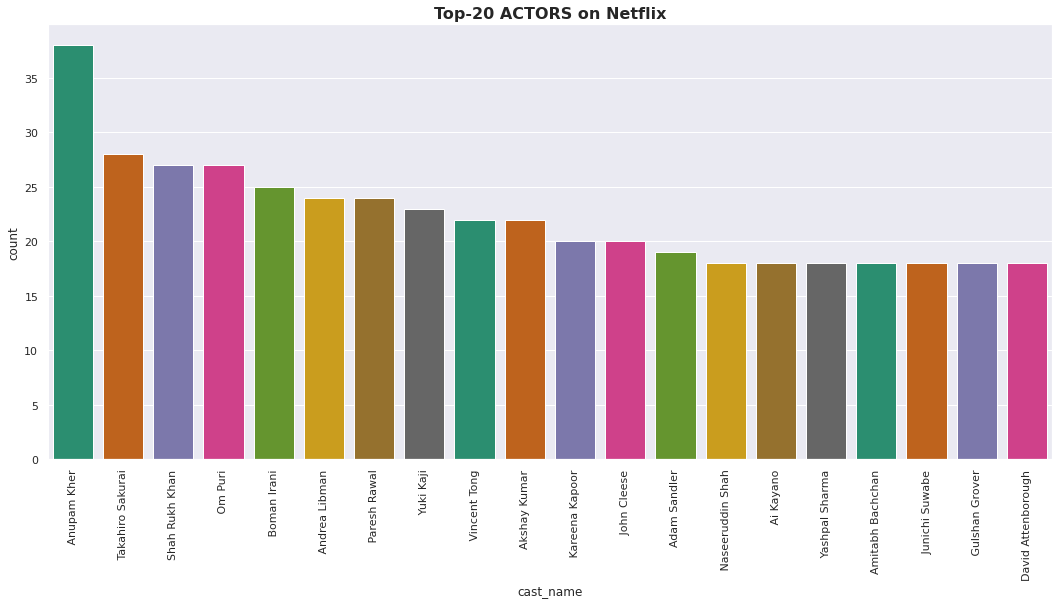

In [49]:
# Top 20 actors netflix
data['cast_name'] = data['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in data['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(18,8))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2")
plt.title("Top-20 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

**OBSERVATION:**

*   The top actor on Netflix Movies, based on the number of titles, is Anupam Kher,and Takahiro Sakurai.



**TOP 10 ACTORS TV Shows BASED ON THE NUMBER OF TITLES:**

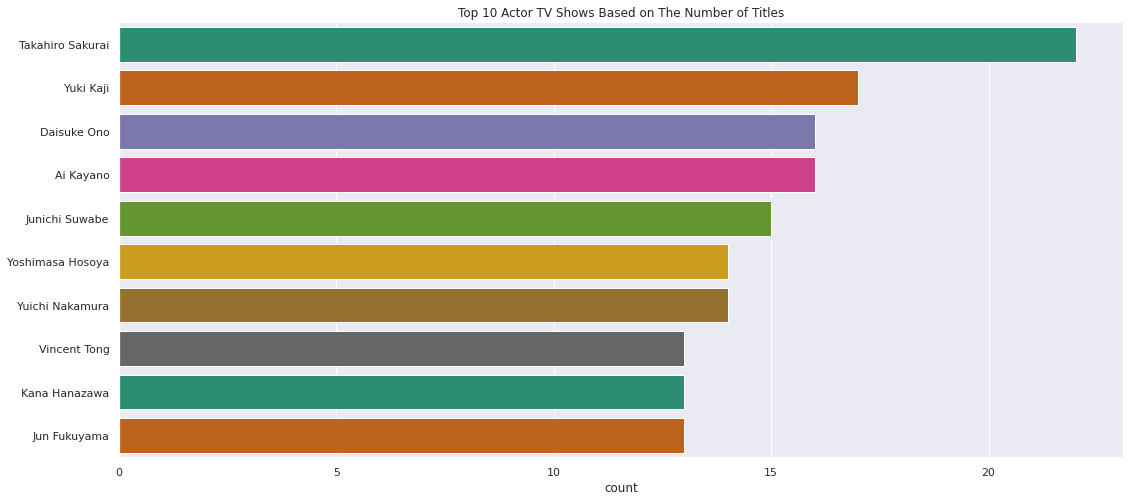

In [50]:
#Top 10 Actor TV Shows Based on The Number of Titles
filtered_cast_shows = netflix_shows[netflix_shows.cast != 'missing info'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(18,8))
plt.title('Top 10 Actor TV Shows Based on The Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette="Dark2")
plt.show()

**OBSERVATION:**


*   The top actor on Netflix TV_show, based on the number of titles, is Takahiro Sakurai.






**TOP 10 ACTORS Movies BASED ON THE NUMBER OF TITLES:**

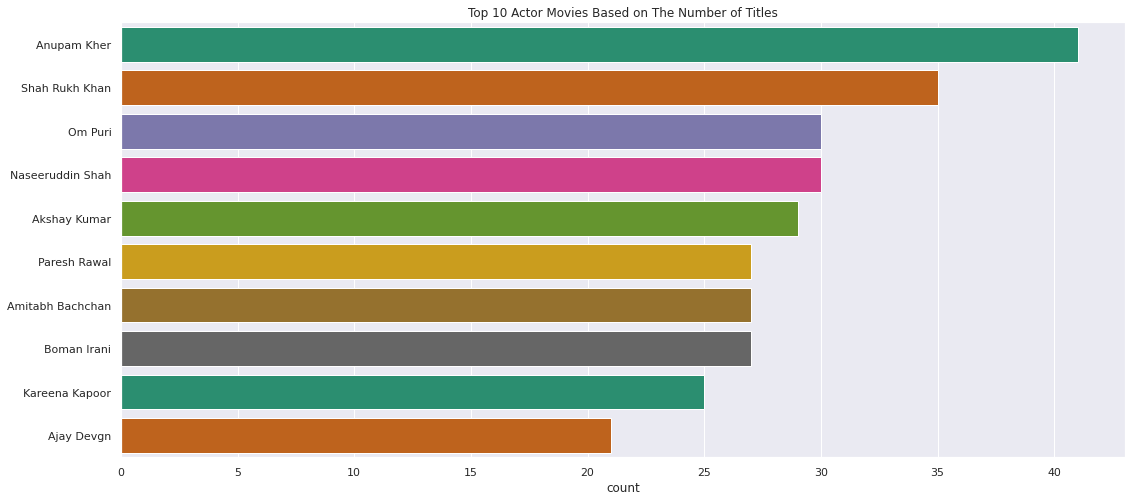

In [51]:
#top 10 Actor Movies Based on The Number of Titles
filtered_cast_movie = netflix_movies[netflix_movies.cast != 'missing info'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(18,8))
plt.title('Top 10 Actor Movies Based on The Number of Titles')
sns.countplot(y = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10], palette="Dark2")
plt.show()

**OBSERVATION**


*   The top actor on Netflix Movies, based on the number of titles, is Anupam Kher
*   The 2nd top was Shah rukh khan.



**SEASON WISE DISTRIBUTION OF TV SHOWS:**

In [52]:
netflix_shows['duration'].value_counts()

1     1608
2      382
3      184
4       87
5       58
6       30
7       19
8       18
9        8
10       6
11       3
13       2
12       2
15       2
16       1
Name: duration, dtype: int64

In [53]:
# Season-wise distribution of tv shows
shows=netflix_shows['duration'].value_counts().reset_index()
shows.head()

index  duration
0      1      1608
1      2       382
2      3       184
3      4        87
4      5        58

In [54]:
# Season-wise distribution of tv shows
shows=netflix_shows['duration'].value_counts().T.reset_index()
fig = px.pie(shows,values='duration',names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title="season-wise distribution of tv shows")
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker=dict( line=dict(color='#7851a9', width=2)))

**OBSERVATION:**

*   THE SEASON 1 IS 66.7% OR 1680 IN COUNTS.
*   THE SEASON 2 IS 15.9% OR 382 IN COUNTS



In [55]:
movies=netflix_movies['duration'].value_counts().reset_index()
movies.head()

index  duration
0     90       136
1     93       131
2     91       125
3     94       125
4     95       119

In [56]:
# Season-wise distribution of tv shows
movies=netflix_movies['duration'].value_counts().reset_index()


fig = px.pie(movies,values='duration',names='index',color_discrete_sequence=px.colors.sequential.Greens)
fig.update_layout(title="season-wise distribution of movies")
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker=dict( line=dict(color='#7851a9', width=2)))

**LONGEST TV - SHOWS PRESENT IN NETFLIX DATASET:**

In [57]:
#LONGEST TV - SHOWS
long_shows = netflix_shows[netflix_shows['duration']>9]
long_shows_data = long_shows[['title','duration']]
tf=long_shows_data.sort_values(by=['duration'],ascending=False)
tf

title  duration
2538                      Grey's Anatomy        16
4438                                NCIS        15
5912                        Supernatural        15
1471              COMEDIANS of the world        13
5137                        Red vs. Blue        13
1537                      Criminal Minds        12
7169                   Trailer Park Boys        12
1300                              Cheers        11
2263                             Frasier        11
2678                           Heartland        11
1577                          Dad's Army        10
1597    Danger Mouse: Classic Collection        10
2288                             Friends        10
3592  LEGO Ninjago: Masters of Spinjitzu        10
5538                    Shameless (U.S.)        10
5795                       Stargate SG-1        10

In [58]:
fig = px.pie(tf,values='duration',names='title',color_discrete_sequence=px.colors.sequential.Greens)
fig.update_layout(title="season-wise distribution of tv shows")
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker=dict( line=dict(color = 'RebeccaPurple', width=2)))

**OBSERVATION:**

*   Grey's Anatomy' Is 16 in duration so its the longest netflix video.
*   Than 'NCIS 15' and 'Supernatural 15' are 15 in duration.




**TOP 20 GENRES ON NETFLIX DATA:**

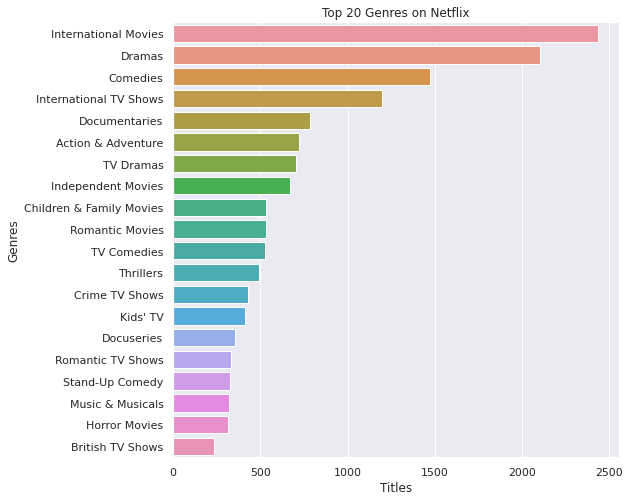

In [59]:
#Top 20 Genres on DATA
filtered_genres = data.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(8,8))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

**OBSERVATION :**


*   International Movies,Dramas are the most famous Generas on netflix data



**TOP 20 GENRES ON NETFLIX_Shows**

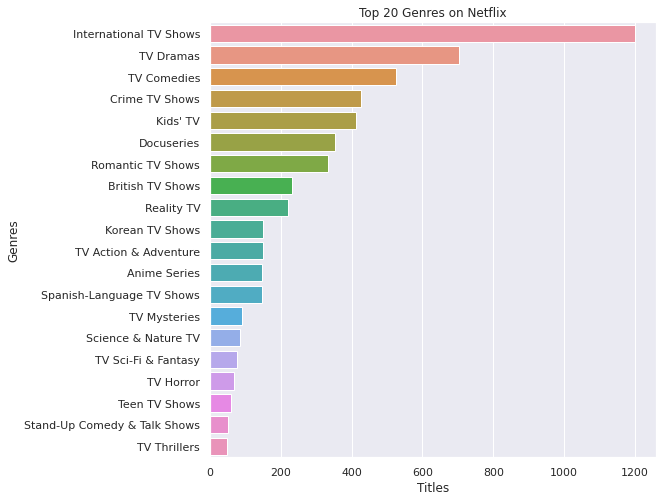

In [60]:
#Top 20 Genres on Netflix_SHOW
filtered_genres = netflix_shows.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(8,8))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

OBSERVATION:


*   International tvshows,TV Dramas are the most famous Generas on netflix TV shows



 **MOST ACTIVE DIRACTOR**

In [61]:
top_dir = data['director'].value_counts().reset_index()
top_dir = top_dir[top_dir['director'] >=8]
top_dir.head()

index  director
0  Raúl Campos, Jan Suter      2407
1            Marcus Raboy        16
2               Jay Karas        14
3     Cathy Garcia-Molina        13
4             Jay Chapman        12

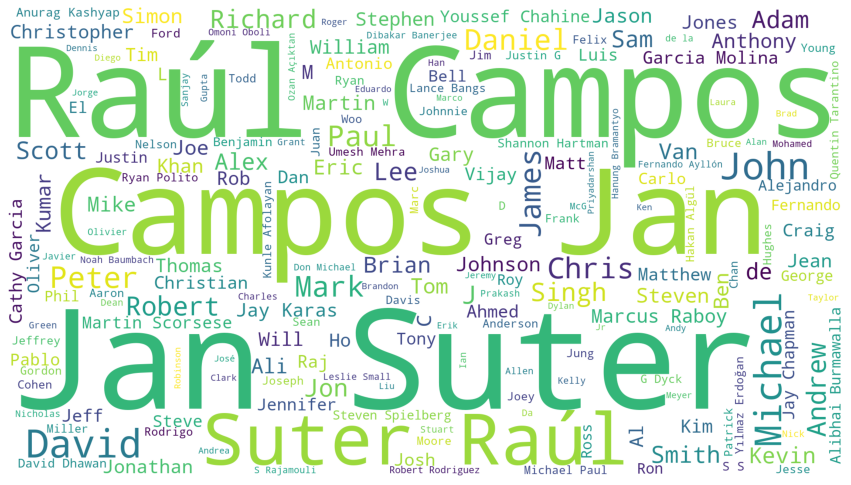

In [62]:
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(data.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**OBSERVATION:**

*   Raúl Campos, Jan Suter makes more fillm present in netflix dataset





---



---



# **DATA CLEANING AND PREPROCESSING**

In [63]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'day_added', 'cast_name'],
      dtype='object')

In [64]:
netflix_movies.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'day_added'],
      dtype='object')

In [65]:
netflix_shows.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'day_added'],
      dtype='object')

**Label encoding:**

In [71]:
new_netflix.head()

type        country  release_year rating  duration  \
0  TV Show         Brazil          2020  TV-MA         4   
1    Movie         Mexico          2016  TV-MA        93   
2    Movie      Singapore          2011      R        78   
3    Movie  United States          2009  PG-13        80   
4    Movie  United States          2008  PG-13       123   

                                           listed_in  year_added  month_added  
0  International TV Shows, TV Dramas, TV Sci-Fi &...        2020            8  
1                       Dramas, International Movies        2016           12  
2                Horror Movies, International Movies        2018           12  
3  Action & Adventure, Independent Movies, Sci-Fi...        2017           11  
4                                             Dramas        2020            1

In [72]:
#Import Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_netflix["type"] = le.fit_transform(new_netflix["type"])
new_netflix["country"] = le.fit_transform(new_netflix["country"])
new_netflix['rating'] = le.fit_transform(new_netflix['rating'])
new_netflix['listed_in'] = le.fit_transform(new_netflix['listed_in'])

In [73]:
#combining genre and description column 
text_df = data['listed_in'] + data['description']
text_df

0       International TV Shows, TV Dramas, TV Sci-Fi &...
1       Dramas, International MoviesAfter a devastatin...
2       Horror Movies, International MoviesWhen an arm...
3       Action & Adventure, Independent Movies, Sci-Fi...
4       DramasA brilliant group of students become car...
                              ...                        
7782    Dramas, International MoviesWhen Lebanon's Civ...
7783    Dramas, International Movies, Music & Musicals...
7784    Documentaries, International Movies, Music & M...
7785    International TV Shows, Reality TVDessert wiza...
7786    Documentaries, Music & MusicalsThis documentar...
Length: 7787, dtype: object

In [74]:
#fuction for cleaning text
def clean_text(text):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(text)
    tokens=[le.lemmatize(w) for w in word_tokens if w not in STOPWORDS and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text

In [75]:
new_text_df = text_df.apply(clean_text)
new_text_df

0       International Shows Dramas Sci-Fi FantasyIn fu...
1       Dramas International MoviesAfter devastating e...
2       Horror Movies International MoviesWhen army re...
3       Action Adventure Independent Movies Sci-Fi Fan...
4       DramasA brilliant group student become card-co...
                              ...                        
7782    Dramas International MoviesWhen Lebanon Civil ...
7783    Dramas International Movies Music MusicalsA sc...
7784    Documentaries International Movies Music Music...
7785    International Shows Reality TVDessert wizard A...
7786    Documentaries Music MusicalsThis documentary d...
Length: 7787, dtype: object

EXTRACTING THE FEATURES AND CREATING THE DOCUMENT-TERM-MATRIX ( DTM )



1.    LSA is generally implemented with Tfidf values everywhere and not with the Count Vectorizer.

1.    max_features depends on your computing power and also on eval. metric (coherence score is a metric for topic model). Try the value that gives best eval. metric and doesn't limits processing power.
2.    Default values for min_df & max_df worked well.


2.   Can try different values for ngram_range



In [76]:
vect =TfidfVectorizer(stop_words=STOPWORDS,max_features=1000)
vect_text=vect.fit_transform(new_text_df)
print(vect.get_feature_names())

['000', '10', '1970s', '1980s', 'ability', 'academy', 'accident', 'accidentally', 'account', 'accused', 'across', 'action', 'activist', 'actor', 'actress', 'adult', 'adventure', 'adventurea', 'affair', 'africa', 'african', 'aged', 'agency', 'agent', 'aging', 'agrees', 'alien', 'along', 'also', 'always', 'ambition', 'ambitious', 'america', 'american', 'amid', 'among', 'ancient', 'angeles', 'animal', 'animated', 'anime', 'another', 'answer', 'anthology', 'anything', 'apart', 'apartment', 'army', 'around', 'arrives', 'art', 'artist', 'aspiring', 'assassin', 'athlete', 'attack', 'attempt', 'attention', 'audience', 'avenge', 'away', 'baby', 'bachelor', 'back', 'band', 'bank', 'based', 'battle', 'beautiful', 'beauty', 'become', 'becomes', 'becoming', 'befriends', 'begin', 'behind', 'belief', 'beloved', 'best', 'better', 'beyond', 'biggest', 'bill', 'biopic', 'birth', 'birthday', 'black', 'body', 'bollywood', 'bond', 'book', 'bos', 'boy', 'boyfriend', 'brave', 'break', 'bride', 'bring', 'brin

In [77]:
idf=vect.idf_
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
print(l)
print(l[0],l[-1])
print(dd['international'])
print(dd['ability'])

['international', 'dramas', 'movies', 'shows', 'comedies', 'family', 'life', 'action', 'romantic', 'adventure', 'independent', 'young', 'moviesa', 'woman', 'find', 'crime', 'friend', 'children', 'world', 'series', 'love', 'documentaries', 'take', 'stand', 'kids', 'year', 'music', 'horror', 'must', 'documentary', 'movieswhen', 'help', 'fi', 'sci', 'school', 'story', 'reality', 'father', 'home', 'teen', 'british', 'high', 'girl', 'group', 'secret', 'moviesafter', 'team', 'docuseries', 'student', 'anime', 'murder', 'comedy', 'make', 'daughter', 'three', 'star', 'city', 'time', 'mother', 'show', 'special', 'fall', 'sports', 'save', 'death', 'turn', 'brother', 'town', 'back', 'wife', 'moviesin', 'past', 'classic', 'true', 'meet', 'return', 'becomes', 'dramasa', 'face', 'fight', 'korean', 'come', 'spanish', 'begin', 'child', 'best', 'film', 'get', 'language', 'mysterious', 'power', 'battle', 'relationship', 'old', 'work', 'dream', 'force', 'behind', 'couple', 'thrillersa', 'try', 'struggle',

**Topic Modeling**



1.   LSA(Latent semantic analysis)

*   Latent semantic analysis (LSA) is a technique in natural language processing, in particular distributional semantics, of analyzing relationships between a set of documents and the terms they contain by producing a set of concepts related to the documents and terms. LSA assumes that words that are close in meaning will occur in similar pieces of text





In [78]:
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)
print(lsa_top[0])
print(lsa_top.shape)

[ 0.20305835  0.06207511  0.09445918 -0.08664872 -0.06538    -0.02543706
 -0.07428319 -0.03545247  0.12290328  0.05756393]
(7787, 10)


In [79]:
l=lsa_top[0]
print("NETFLIX TOPIC 0 :")
for i,topic in enumerate(l):
  print("NETFLIX Topic ",i," : ",topic*100)

NETFLIX TOPIC 0 :
NETFLIX Topic  0  :  20.30583493218585
NETFLIX Topic  1  :  6.207510505670853
NETFLIX Topic  2  :  9.445918395870297
NETFLIX Topic  3  :  -8.664872102840192
NETFLIX Topic  4  :  -6.537999643037898
NETFLIX Topic  5  :  -2.5437062964694745
NETFLIX Topic  6  :  -7.428318521600677
NETFLIX Topic  7  :  -3.545246507389088
NETFLIX Topic  8  :  12.290327824112046
NETFLIX Topic  9  :  5.756393340396318


**Similalry for other documents we can do this. However note that values don't add to 1 as in LSA it is not probabiltiy of a topic in a document.**

In [80]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 1000)
[[ 0.00656684  0.00545201  0.00758313 ...  0.13090086  0.00875224
   0.00581992]
 [ 0.00462531 -0.00387644  0.00032481 ... -0.05997155 -0.0052364
   0.00116477]
 [ 0.00355311  0.00036984  0.00147791 ... -0.04136565 -0.00219319
   0.00059625]
 ...
 [ 0.00289277  0.00428579 -0.0031407  ...  0.02064381 -0.0031625
   0.0038083 ]
 [ 0.00761054 -0.00301703 -0.00797036 ...  0.00235276 -0.00085109
  -0.00390913]
 [ 0.00970491 -0.00218043  0.0016886  ...  0.2090928   0.00040504
  -0.00443574]]


**TOP-10 TOPICS ON NETFLIX**

In [81]:
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print(" NETFLIX Genre "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

 NETFLIX Genre 0: 
international shows movies dramas comedies romantic family life independent young 

 NETFLIX Genre 1: 
shows crime british spanish language korean docuseries series reality romantic 

 NETFLIX Genre 2: 
adventure action fi sci kids stand children family world series 

 NETFLIX Genre 3: 
stand special comedy comedian comic talk family take show life 

 NETFLIX Genre 4: 
family children movies shows save friend comedieswhen christmas music kids 

 NETFLIX Genre 5: 
documentaries documentary music world docuseries series moviesthis sports life international 

 NETFLIX Genre 6: 
comedies romantic friend kids love life school best series high 

 NETFLIX Genre 7: 
series kids independent docuseries dramas friend science nature anime british 

 NETFLIX Genre 8: 
horror movies fi sci romantic series reality kids thrillersa love 

 NETFLIX Genre 9: 
life docuseries young woman reality nature science family love romantic 



**Latent Dirichlet Allocation (LDA)**

latent Dirichlet allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar.



In [82]:
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
# n_components is the number of topics
lda_top=lda_model.fit_transform(vect_text)
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top[0])

(7787, 10)
[0.02414369 0.02414188 0.02415139 0.02414388 0.02414507 0.02414735
 0.02414542 0.02414519 0.78268527 0.02415086]


In [83]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)
# composition of doc 0 for eg
print("Doc 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

1.0
Doc 0: 
Topic  0 :  2.4143686048684354 %
Topic  1 :  2.4141879217654534 %
Topic  2 :  2.4151390106367727 %
Topic  3 :  2.4143883513948543 %
Topic  4 :  2.4145066465825726 %
Topic  5 :  2.4147352819329475 %
Topic  6 :  2.4145420095326444 %
Topic  7 :  2.41451899581732 %
Topic  8 :  78.2685268641482 %
Topic  9 :  2.4150863133207983 %


In [84]:
print(lda_model.components_[0])
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[ 0.10414225  9.18083384  0.103704    0.10433303  0.10428384  0.10388906
  0.114864    0.10875582  0.10368646  0.10616562 14.20345956  0.23635513
  0.10416903  0.10360392  0.10373522  0.10379626  0.12235936  0.10615722
  1.21621691  0.1053449   0.16681217  0.10321591  0.10311463  0.10427348
  0.10385281  0.10365488  0.10397804  0.10346902  0.10369907  0.10397844
  8.49874395  0.10627625  0.10384385  4.31187166  0.10509087  0.10405966
  0.10534692  0.10352786  0.10370611  0.10349744  4.88527498  0.10451765
  0.10378982  0.1126132   0.10366809  0.1043581   0.1036386   0.11118019
  0.13038708  0.103861   10.54465211  0.10352099  0.10514894  0.10517849
  0.1039959   0.10406276  0.10334019  0.10341961  0.19569487  7.25209978
  0.10434744  0.10370839 10.01061432  0.2135323   0.10713423  0.13741651
  0.10360531  6.12323185  0.11699834  0.1046251   0.10615236  0.10917674
  1.331706    0.10390977  1.80578772  0.5719676   0.10321872  0.10344972
  0.1030637   0.10368357  0.10322208  0.10422502  0

**most important features for each topic**

In [85]:
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:5]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
old year protect keep character 

Topic 1: 
documentaries music documentary rich look 

Topic 2: 
dramas international comedies romantic movies 

Topic 3: 
stand family special comedies movies 

Topic 4: 
docuseries shows reality british series 

Topic 5: 
travel plan modern time master 

Topic 6: 
action adventure crime shows drug 

Topic 7: 
international doctor moviesthe movies dramas 

Topic 8: 
movies adventure sci fi action 

Topic 9: 
shows international crime dramas romantic 



In [86]:
# transform the data using StandardScaler
Flix_df_standarized = pd.DataFrame(StandardScaler().fit_transform(new_netflix),columns = new_netflix.columns)

#Perform a PCA to visualize clusters
pca = PCA(n_components = 2)
Flix_df_pca=pd.DataFrame(pca.fit_transform(Flix_df_standarized))

In [87]:
Flix_df_standarized.head()

type   country  release_year    rating  duration  listed_in  \
0  1.493694 -2.042040      0.692878  0.491646 -1.278234   1.083000   
1 -0.669481 -0.505797      0.236092  0.491646  0.468664   0.381107   
2 -0.669481 -0.100321     -0.334890 -1.052290  0.174243   0.588484   
3 -0.669481  0.870538     -0.563284 -1.566936  0.213499  -1.716598   
4 -0.669481  0.870538     -0.677480 -1.566936  1.057505   0.253490   

   year_added  month_added  
0    1.083903     0.340351  
1   -1.797501     1.452995  
2   -0.356799     1.452995  
3   -1.077150     1.174834  
4    1.083903    -1.606774

**1.AGGLOMERATIVE CLUSTERING:**

In [88]:
# lets start with programimg
def silhouette_analysis(X, X_pca, range_n_clusters):
    
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 10)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = AgglomerativeClustering(n_clusters = n_clusters,
                                   affinity = 'euclidean',
                                   linkage = 'ward')
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print('For n_clusters =', n_clusters,
              'The average silhouette_score is :', silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 15
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.5, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10
        ax1.set_title('The silhouette plot for the various clusters.')
        ax1.set_xlabel('The silhouette coefficient values')
        ax1.set_ylabel('Clusters')

        ax1.axvline(x=silhouette_avg, color = 'cyan', linestyle= '--')

        ax1.set_yticks([])  
        ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_pca[0], X_pca[1], c=colors)
    
        ax2.set_title('The visualization of the clustered data.')
        ax2.set_xlabel('PCA component 1')
        ax2.set_ylabel('PCA component 2')

        plt.suptitle(('\nSilhouette analysis for Agglomerative clustering '
                      'with n_clusters = %d' % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2666501490102767


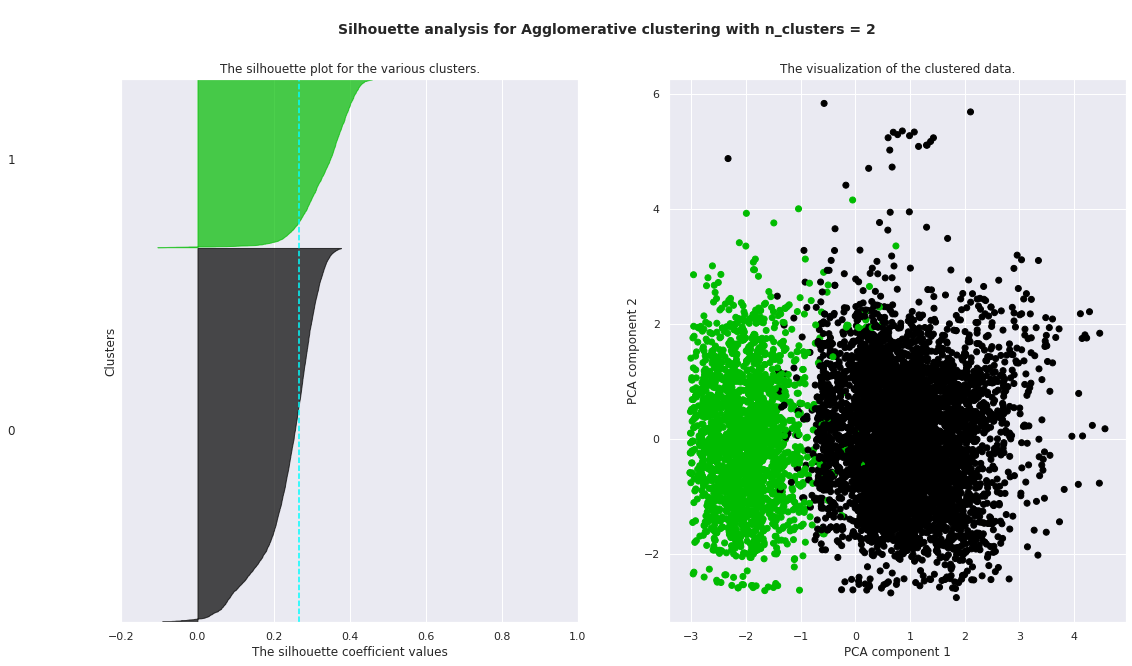

In [89]:
silhouette_analysis(np.array(Flix_df_standarized),Flix_df_pca,[2])

For n_clusters = 4 The average silhouette_score is : 0.18002715134661615


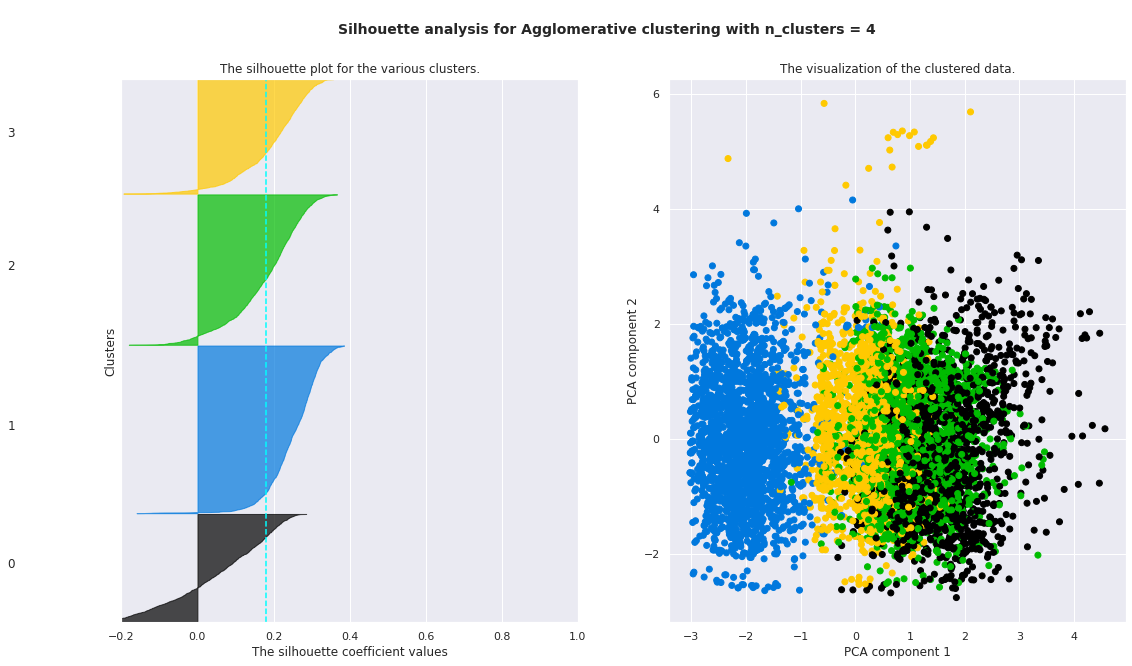

In [90]:
silhouette_analysis(np.array(Flix_df_standarized),Flix_df_pca,[4])

For n_clusters = 5 The average silhouette_score is : 0.19419177406687443


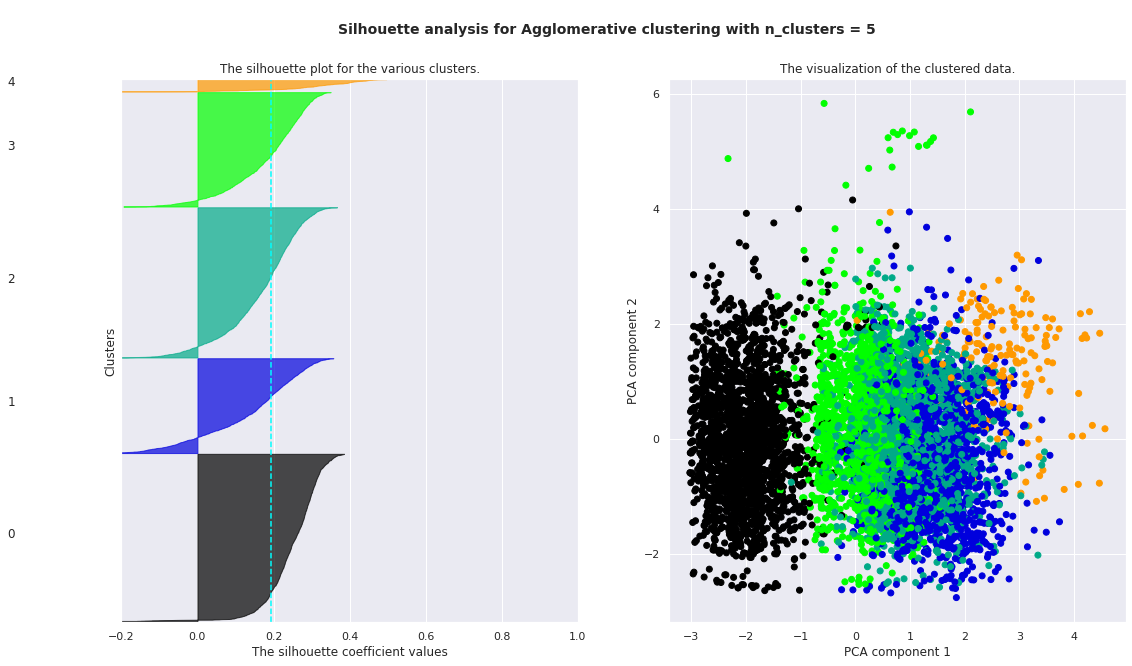

In [91]:
silhouette_analysis(np.array(Flix_df_standarized),Flix_df_pca,[5])

For n_clusters = 6 The average silhouette_score is : 0.16466299191465364


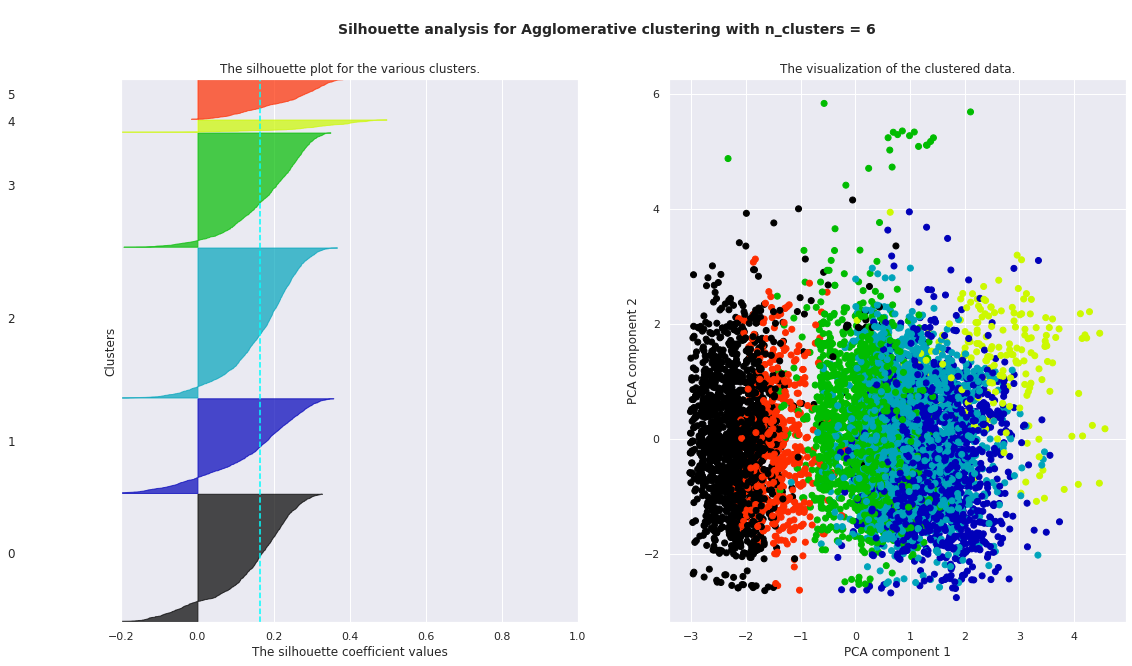

In [92]:
silhouette_analysis(np.array(Flix_df_standarized),Flix_df_pca,[6])

**Assume we cut vertical lines with a horizontal line to obtain the number of clusters. Number of clusters = 4**

# **K-MEANS CLUSTERING:**

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


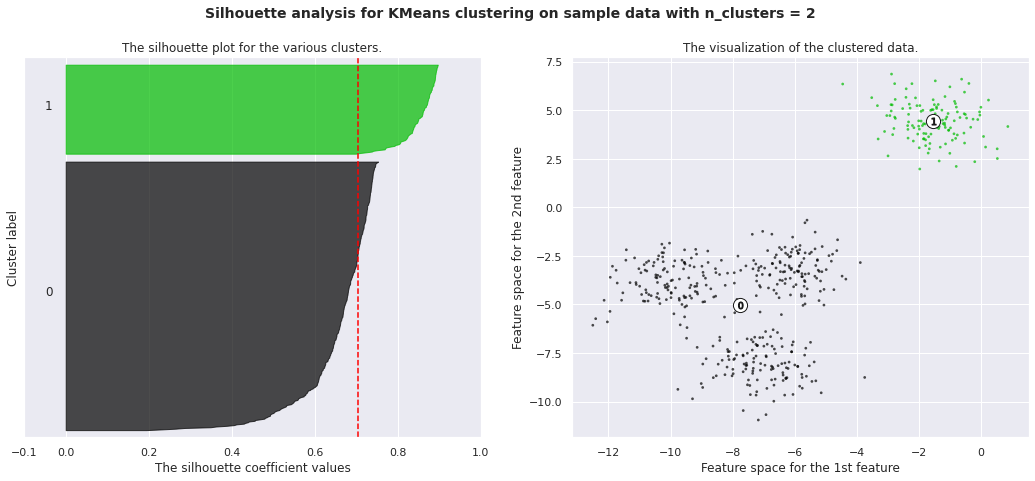

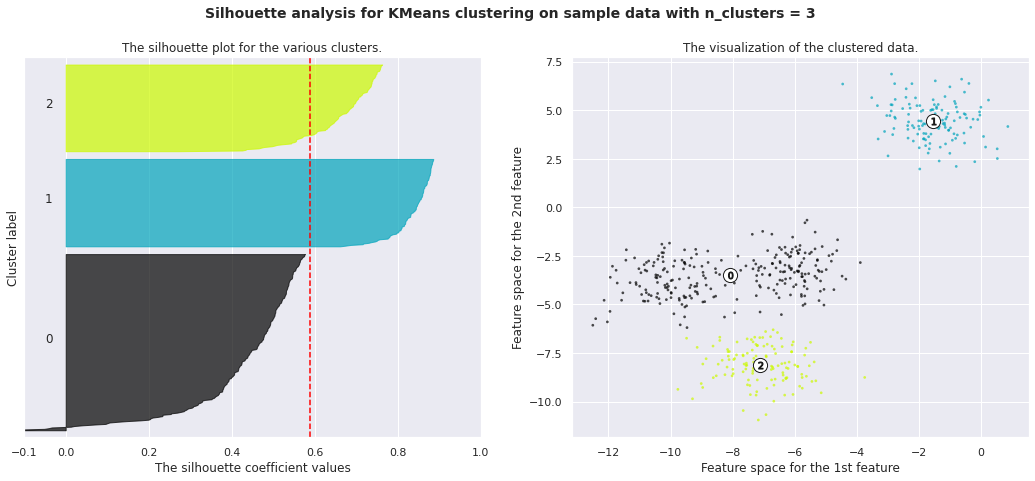

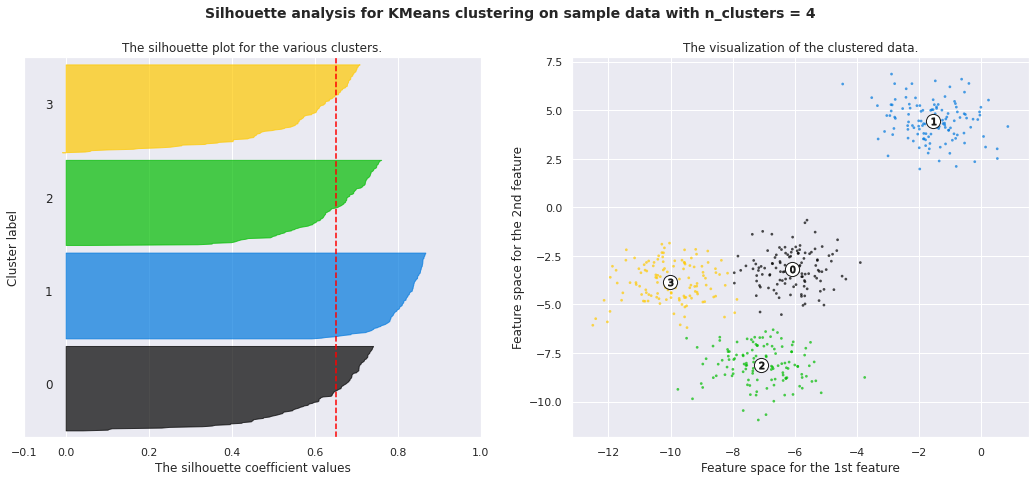

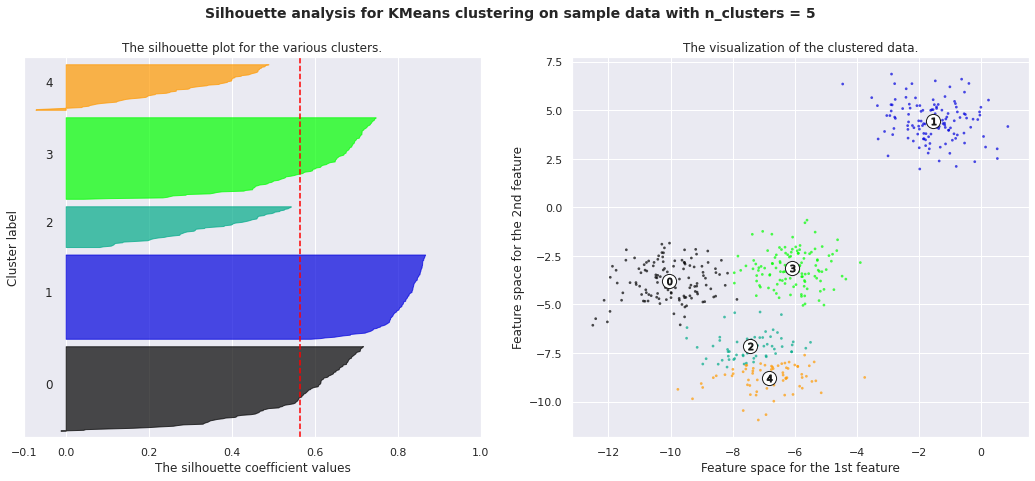

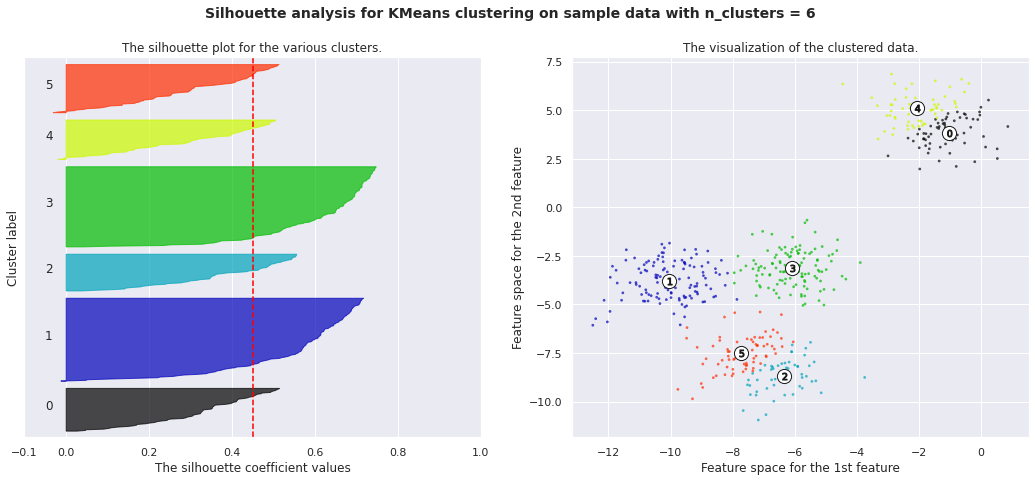

In [93]:
# Generating the sample data from make_blobs
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)              #  For reproducibility

range_n_clusters = [2, 3, 4, 5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()



*   Here is the Silhouette analysis done on the above plots to select an optimal value for n_clusters.


*   The value of 4 and 5 for n_clusters looks to be the optimal one. The silhouette score for each cluster is above average silhouette scores.



**K-MEAN CLUSTERING with ELBOW METHOD:**

In [94]:
#import KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc = scaler.fit_transform(new_netflix)
netflix_df = pd.DataFrame(sc, columns=list(new_netflix.columns))
X = netflix_df
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(netflix_df).score(netflix_df) for i in range(len(kmeans))]


**ELBOW CURVE:**

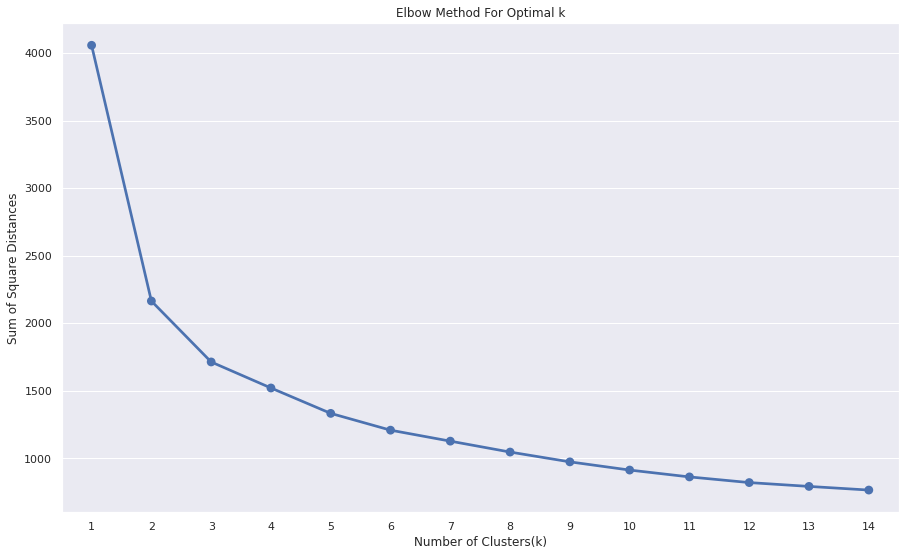

In [95]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [96]:
#fitting
kmeans = KMeans(n_clusters=5)
kmeans.fit(netflix_df)

KMeans(n_clusters=5)

In [97]:
len(kmeans.labels_)

data['cluster'] = kmeans.labels_
data.head()

show_id     type  title                director  \
0      s1  TV Show     3%  Raúl Campos, Jan Suter   
1      s2    Movie   7:19       Jorge Michel Grau   
2      s3    Movie  23:59            Gilbert Chan   
3      s4    Movie      9             Shane Acker   
4      s5    Movie     21          Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating  duration  \
0 2020-08-14          2020  TV-MA         4   
1 2016-12-23          2016  TV-MA        93   
2 2018-12-20          2011      R        78   
3 2017-11-16          2009  PG-13        80   
4 2020-01-01          2008  PG-13       123   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   
3  In a postapocalyptic world, rag-doll robots hi...        2017           11   
4  A brilliant group of students become card-coun...        2020            1   

   day_added                                          cast_name  cluster  
0         14  [João Miguel,  Bianca Comparato,  Michel Gomes...        1  
1         23  [Demián Bichir,  Héctor Bonilla,  Oscar Serran...        0  
2         20  [Tedd Chan,  Stella Chung,  Henley Hii,  Lawre...        0  
3         16  [Elijah Wood,  John C. Reilly,  Jennifer Conne...        0  
4          1  [Jim Sturgess,  Kevin Spacey,  Kate Bosworth, ...        2

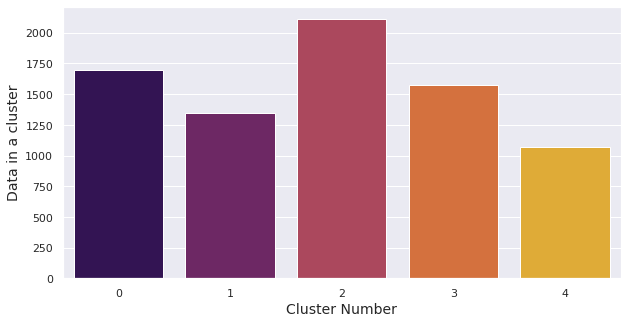

In [98]:
plt.figure(figsize=(10,5))
axis = sns.barplot(x=np.arange(0,5,1),palette="inferno",y=data.groupby(['cluster']).count()['type'].values)
x=axis.set_xlabel("Cluster Number", fontsize =14)
x=axis.set_ylabel("Data in a cluster", fontsize =14)
plt.show()


**We clearly see that one cluster is the largest and one cluster has the fewest number of movies.**

In [99]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(netflix_df)

print(len(kmeans.labels_))
data['cluster'] = kmeans.labels_
data.head()

7787


show_id     type  title                director  \
0      s1  TV Show     3%  Raúl Campos, Jan Suter   
1      s2    Movie   7:19       Jorge Michel Grau   
2      s3    Movie  23:59            Gilbert Chan   
3      s4    Movie      9             Shane Acker   
4      s5    Movie     21          Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating  duration  \
0 2020-08-14          2020  TV-MA         4   
1 2016-12-23          2016  TV-MA        93   
2 2018-12-20          2011      R        78   
3 2017-11-16          2009  PG-13        80   
4 2020-01-01          2008  PG-13       123   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   
3  In a postapocalyptic world, rag-doll robots hi...        2017           11   
4  A brilliant group of students become card-coun...        2020            1   

   day_added                                          cast_name  cluster  
0         14  [João Miguel,  Bianca Comparato,  Michel Gomes...        2  
1         23  [Demián Bichir,  Héctor Bonilla,  Oscar Serran...        0  
2         20  [Tedd Chan,  Stella Chung,  Henley Hii,  Lawre...        3  
3         16  [Elijah Wood,  John C. Reilly,  Jennifer Conne...        3  
4          1  [Jim Sturgess,  Kevin Spacey,  Kate Bosworth, ...        4

In [100]:
data.groupby(['cluster']).mean()

release_year    duration   year_added  month_added  day_added
cluster                                                               
0         2012.424640  109.014417  2018.419397     8.838139  12.507208
1         2016.237113    1.808810  2018.693533     3.432990  13.644799
2         2016.155622    1.749814  2018.399851     9.688757  12.872673
3         2013.032185   91.358554  2018.311124     9.418972  12.140599
4         2013.187981   98.955288  2018.667788     2.848558  11.460577

In [101]:
size_array = list(data.groupby(['cluster']).count()['duration'].values)
size_array

[1526, 1067, 1343, 1771, 2080]

In [102]:
data[data['cluster']==size_array.index(sorted(size_array)[0])].sample(5)

show_id     type                                title  \
24       s25  TV Show  ​SAINT SEIYA: Knights of the Zodiac   
7100   s7101  TV Show                             Timeline   
5974   s5975  TV Show              Talking Tom and Friends   
6230   s6231  TV Show                             The Code   
6693   s6694  TV Show                The Murder Detectives   

                    director  \
24    Raúl Campos, Jan Suter   
7100  Raúl Campos, Jan Suter   
5974  Raúl Campos, Jan Suter   
6230  Raúl Campos, Jan Suter   
6693  Raúl Campos, Jan Suter   

                                                   cast         country  \
24    Bryson Baugus, Emily Neves, Blake Shepard, Pat...           Japan   
7100  Santiwithi Phrombut, Jamorn Kijsawapak, Orrawa...   United States   
5974  Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...          Cyprus   
6230                                   Marcus du Sautoy  United Kingdom   
6693                                       missing info  United Kingdom   

     date_added  release_year rating  duration  \
24   2020-01-23          2020  TV-14         2   
7100 2018-02-23          2014  TV-14         1   
5974 2020-02-15          2017   TV-Y         1   
6230 2018-02-01          2011  TV-PG         1   
6693 2017-03-31          2015  TV-MA         1   

                                              listed_in  \
24                 Anime Series, International TV Shows   
7100  Crime TV Shows, Docuseries, International TV S...   
5974                              Kids' TV, TV Comedies   
6230  British TV Shows, Docuseries, International TV...   
6693       British TV Shows, Crime TV Shows, Docuseries   

                                            description  year_added  \
24    Seiya and the Knights of the Zodiac rise again...        2020   
7100  Firsthand accounts, re-enactments and computer...        2018   
5974  Full of funny one-liners and always ready for ...        2020   
6230  In this three-part documentary series, host Ma...        2018   
6693  This series tracks the ups and downs of an 18-...        2017   

      month_added  day_added  \
24              1         23   
7100            2         23   
5974            2         15   
6230            2          1   
6693            3         31   

                                              cast_name  cluster  
24    [Bryson Baugus,  Emily Neves,  Blake Shepard, ...        1  
7100  [Santiwithi Phrombut,  Jamorn Kijsawapak,  Orr...        1  
5974  [Colin Hanks,  Tom Kenny,  James Adomian,  Lis...        1  
6230                                 [Marcus du Sautoy]        1  
6693                                     [missing info]        1

In [103]:
data[data['cluster']==size_array.index(sorted(size_array)[-1])].sample(5)

show_id   type                               title  \
4658   s4659  Movie                 One-Way to Tomorrow   
7181   s7182  Movie                      Train to Busan   
5096   s5097  Movie                            Ranbhool   
4430   s4431  Movie  Nature: Raising the Dinosaur Giant   
4372   s4373  Movie                        Mystic Pizza   

                    director  \
4658            Ozan Açıktan   
7181            Sang-ho Yeon   
5096            Girish Joshi   
4430  Raúl Campos, Jan Suter   
4372           Donald Petrie   

                                                   cast        country  \
4658                  Dilan Çiçek Deniz, Metin Akdülger         Turkey   
7181  Gong Yoo, Yu-mi Jung, Dong-seok Ma, Soo-an Kim...    South Korea   
5096  Subodh Bhave, Mohan Joshi, Vinay Apte, Uday Ti...          India   
4430                                 David Attenborough  United States   
4372  Annabeth Gish, Julia Roberts, Lili Taylor, Vin...  United States   

     date_added  release_year rating  duration  \
4658 2020-06-19          2020  TV-MA        90   
7181 2017-03-18          2016  TV-MA       118   
5096 2018-03-15          2010  TV-MA       115   
4430 2017-03-01          2016   TV-G        53   
4372 2021-01-01          1988      R       104   

                                              listed_in  \
4658      Dramas, International Movies, Romantic Movies   
7181  Action & Adventure, Horror Movies, Internation...   
5096     Horror Movies, International Movies, Thrillers   
4430                                      Documentaries   
4372               Comedies, Dramas, Independent Movies   

                                            description  year_added  \
4658  Two strangers cross paths on a train en route ...        2020   
7181  As a zombie outbreak sweeps the country, a dad...        2017   
5096  Believing himself to be God's envoy, a trouble...        2018   
4430  Sir David Attenborough examines a recently dis...        2017   
4372  In a small fishing town, three teenage girls f...        2021   

      month_added  day_added  \
4658            6         19   
7181            3         18   
5096            3         15   
4430            3          1   
4372            1          1   

                                              cast_name  cluster  
4658               [Dilan Çiçek Deniz,  Metin Akdülger]        4  
7181  [Gong Yoo,  Yu-mi Jung,  Dong-seok Ma,  Soo-an...        4  
5096  [Subodh Bhave,  Mohan Joshi,  Vinay Apte,  Uda...        4  
4430                               [David Attenborough]        4  
4372  [Annabeth Gish,  Julia Roberts,  Lili Taylor, ...        4

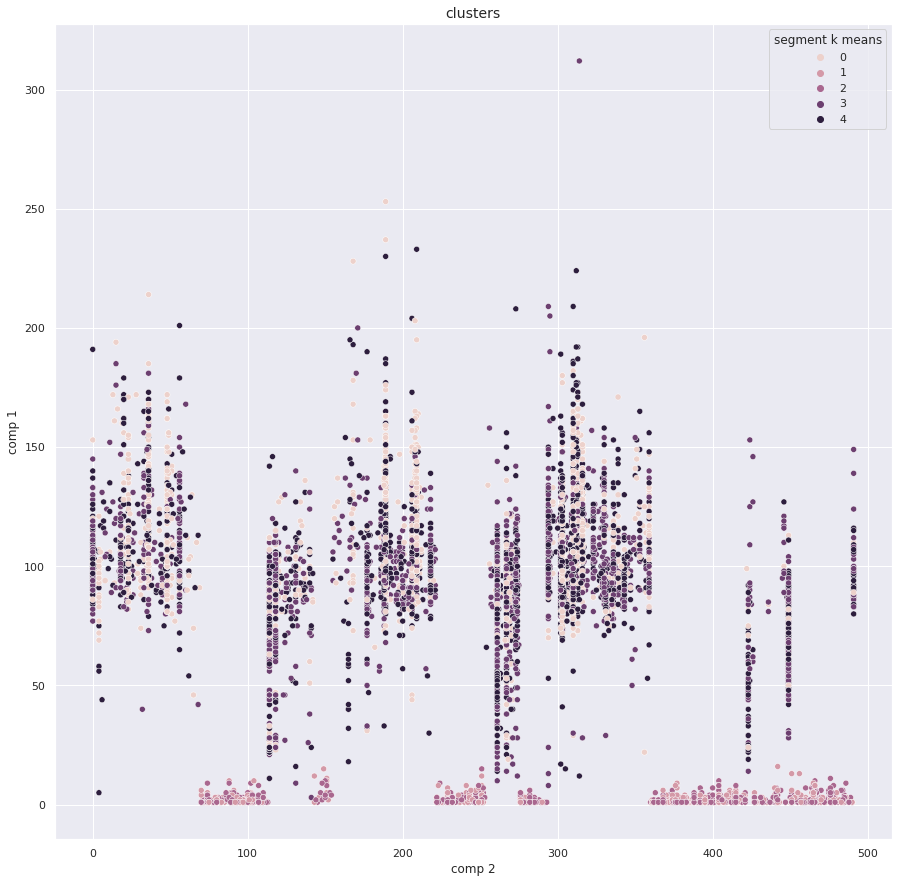

In [104]:
data = pd.concat([new_netflix,pd.DataFrame(score)],axis=1)
data.columns.values[-5:]=['comp 1','comp 2','comp 3','comp 4','comp 5']
data['segment k means'] = kmeans.labels_

#data = data.set_index(data['show_id'])
#f_mm.head()

x_axis = data['comp 2']
y_axis = data['comp 1']
plt.figure(figsize=(15,15))
sns.scatterplot(x_axis,y_axis,hue=data['segment k means'])
plt.title('clusters', fontsize = 14)
plt.show()

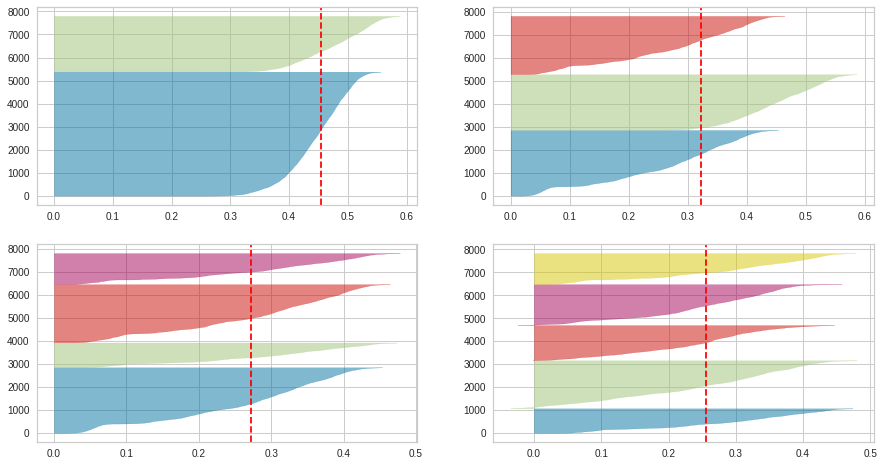

In [105]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

**HYERARCHICAL CLUSTERING:**

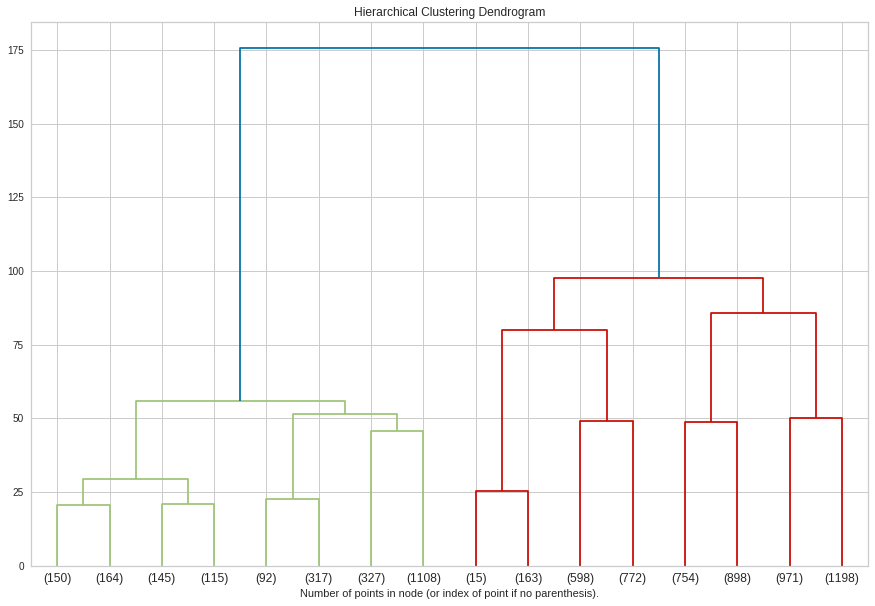

In [106]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


#iris = load_iris()
X = Flix_df_standarized

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.figure(figsize=(15,10))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [107]:
from sklearn.metrics import silhouette_samples, silhouette_score
# lets start with programimg
def silhouette_analysis(X, X_pca, range_n_clusters):
    
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 10)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = AgglomerativeClustering(n_clusters = n_clusters,
                                   affinity = 'euclidean',
                                   linkage = 'ward')
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print('For n_clusters =', n_clusters,
              'The average silhouette_score is :', silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 15
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.5, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10
        ax1.set_title('The silhouette plot for the various clusters.')
        ax1.set_xlabel('The silhouette coefficient values')
        ax1.set_ylabel('Clusters')

        ax1.axvline(x=silhouette_avg, color = 'cyan', linestyle= '--')

        ax1.set_yticks([])  
        ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_pca[0], X_pca[1], c=colors)
    
        ax2.set_title('The visualization of the clustered data.')
        ax2.set_xlabel('PCA component 1')
        ax2.set_ylabel('PCA component 2')

        plt.suptitle(('\nSilhouette analysis for Agglomerative clustering '
                      'with n_clusters = %d' % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2666501490102767


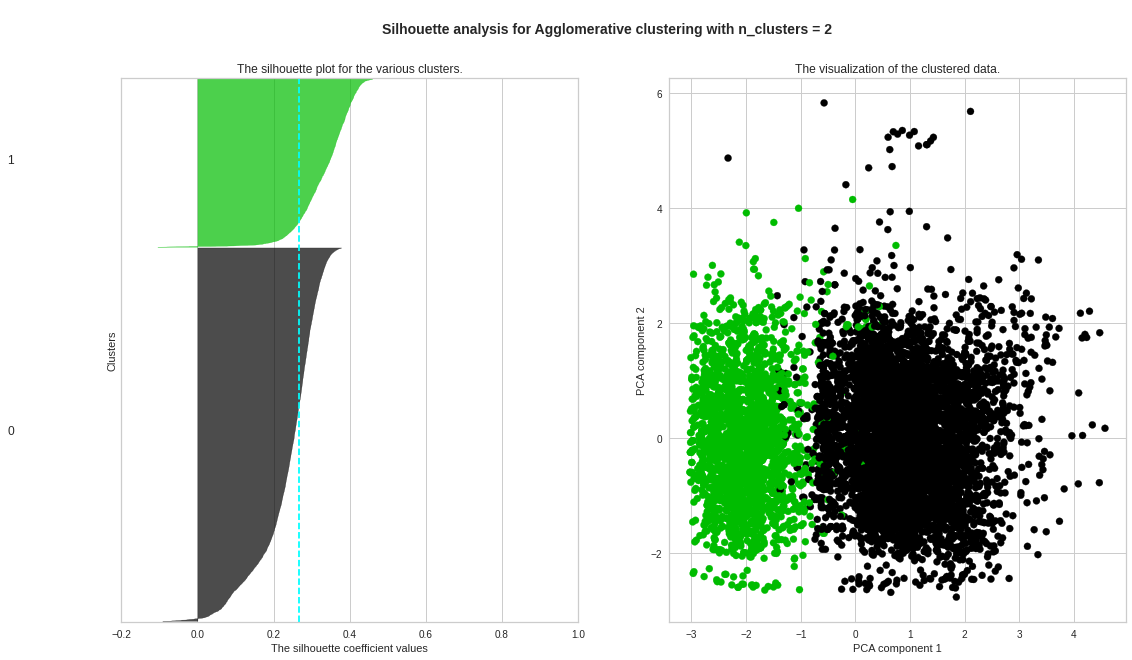

In [108]:
silhouette_analysis(np.array(Flix_df_standarized),Flix_df_pca,[2])

For n_clusters = 3 The average silhouette_score is : 0.21210202670705197


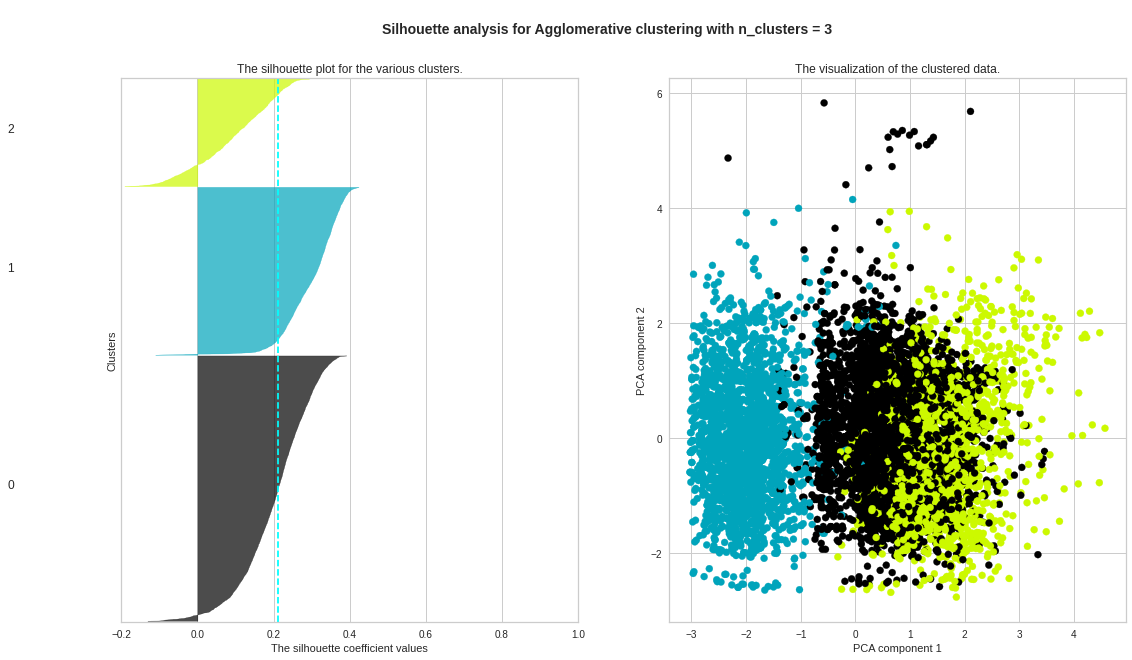

In [109]:
silhouette_analysis(np.array(Flix_df_standarized),Flix_df_pca,[3])

For n_clusters = 4 The average silhouette_score is : 0.18002715134661615


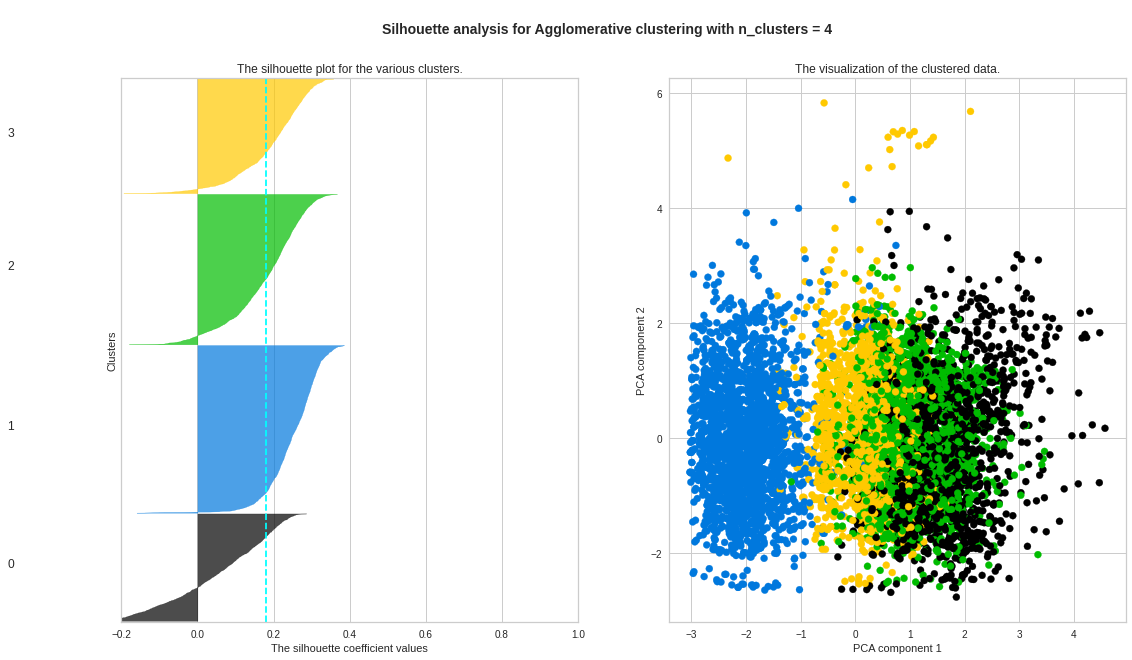

In [110]:
silhouette_analysis(np.array(Flix_df_standarized),Flix_df_pca,[4])

For n_clusters = 4 The average silhouette_score is : 0.18002715134661615


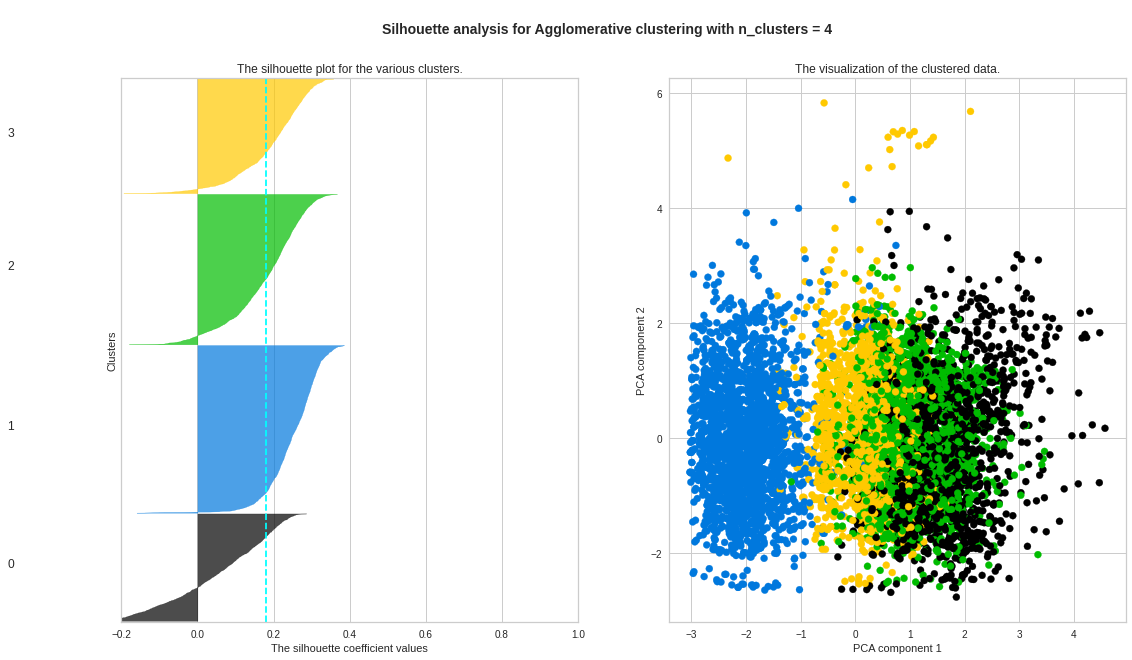

In [111]:
silhouette_analysis(np.array(Flix_df_standarized),Flix_df_pca,[4])


For n_clusters = 5 The average silhouette_score is : 0.19419177406687443


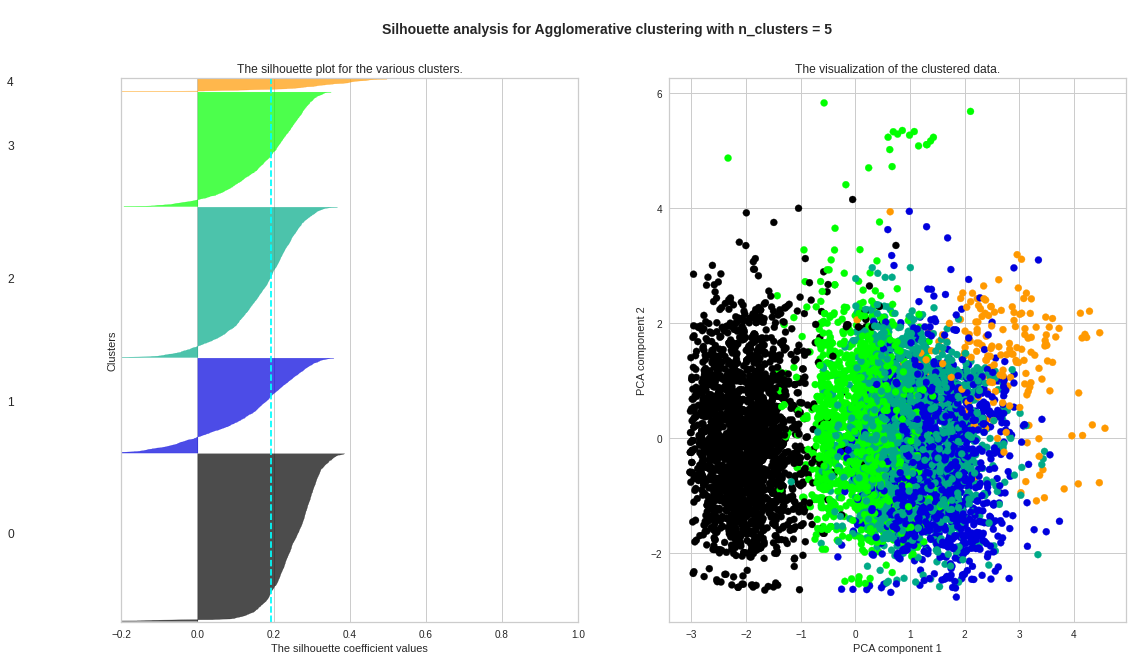

In [112]:
silhouette_analysis(np.array(Flix_df_standarized),Flix_df_pca,[5])

For n_clusters = 6 The average silhouette_score is : 0.16466299191465364


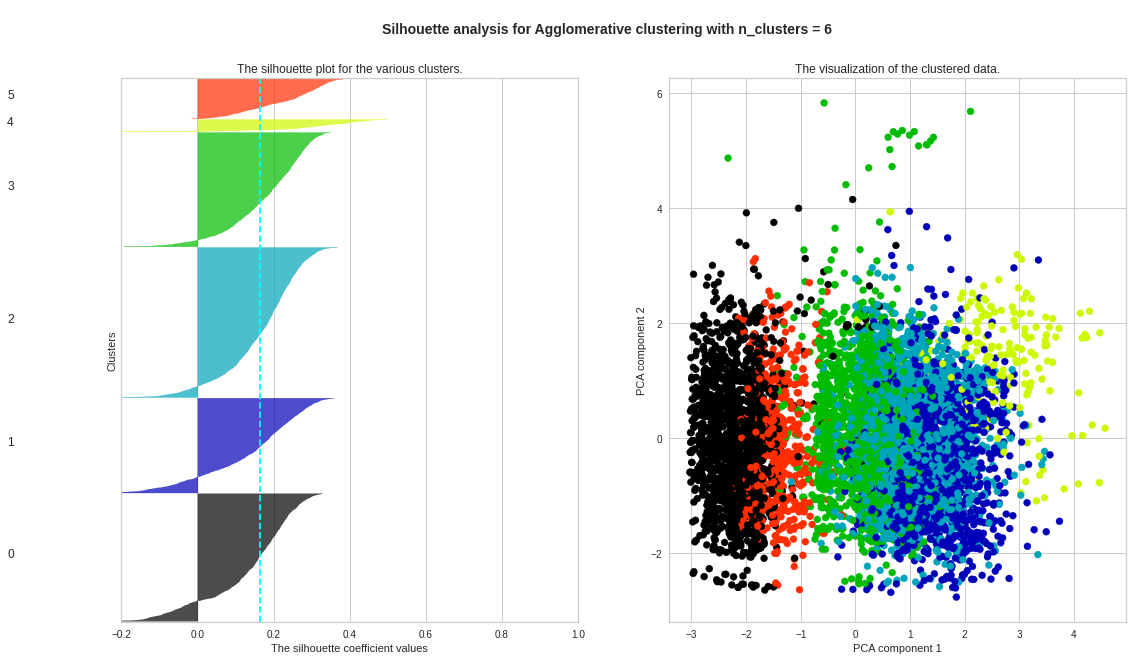

In [113]:
silhouette_analysis(np.array(Flix_df_standarized),Flix_df_pca,[6])



1.   The second thing we did was feature engineering, which involved removing certain variables and preparing a dataframe to feed the clustering algorithms.

1.   For the clustering algorithm, we utilised type ,country ,release_year ,rating ,duration ,listed_in ,year_added ,month_added
2.    Affinity Propagation and K-means Clustering were utilised to build the model.

1.   Silhouette analysis for Agglomerative clustering For n_clusters = 2 The average silhouette_score is : 0.2666501490102767.
2.   5)The model we used was k-means clustering, which consisted of 2,3,4,5,6 clusters. Score of silhoutte in k-measn clustering :

*   n_clusters = 2 The average silhouette_score is : 07049787496083262

*   n_clusters = 3 The average silhouette_score is : 05882004012129721

*   n_clusters = 4 The average silhouette_score is : 06505186632729437
*   n_clusters = 5 The average silhouette_score is : 0.56376469026194


*   n_clusters = 6 The average silhouette_score is : 04504666294372765






6. The model we used was Hierarchical Clustering clustering, which consisted of 2,3,4,5,6 clusters. Score of silhoutte in Hierarchical Clustering :  

*   For n_clusters = 2 The average silhouette_score is :0.2666501490102767



*   For n_clusters = 3 The average silhouette_score is :0.21210202670705197

*   For n_clusters = 4 The average silhouette_score is :0.18002715134661615


*   For n_clusters = 5 The average silhouette_score is :0.19419177406687443


*   For n_clusters = 6 The average silhouette_score is :0.16466299191465364
















---



---

